In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from folium import plugins
from scipy import stats
import math

In [2]:
df=pd.read_csv('Online Sales Data.csv')

***1 - Initial Data Investigation*** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


**My insights**

*1 - we have 8 columns in the dataset and 1155 rows*

*2 - the types of some columns needs to be changed for example : "Date" should be date-time and "Units Sold" should be integer*

*3 - the "Product Name" column should be droped from the start it has only 232 non-null !!*

*4 - We need to handle null values in other columns like "Payment Method"* 

In [4]:
df.sample(5)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
823,10824,2024-08-30,Beauty Products,Beauty Products Lite 811,2,2683.49,5366.98,NaN,Bank Transfer
217,10218,2024-08-05 00:00:00,Home Appliances,NaN,1,449.99,449.99,Europe,PayPal
699,10700,2025-02-17,Electronics,NaN,3,1.0,3.00,North America,Credit Card
339,10340,2024-10-18,Electronics,NaN,1,936.01,936.01,Asia,Debit Card
490,10491,2024-05-19,Home Appliances,NaN,NaN,1.0,3.00,Europe,Credit Card


***My insights***

*we can see that Date is not formally formatted*

In [5]:
df.describe()

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


***My insights***

*The mean in Total Revenue is about 449 but the maximum value is aout 2000000 which means we have outliers in this column*

In [6]:
df['Product Category'].value_counts()

Product Category
Electronics        202
Sports             193
Books              192
Clothing           192
Beauty Products    190
Home Appliances    186
Name: count, dtype: int64

In [7]:
df['Payment Method'].value_counts()

Payment Method
Credit Card       478
PayPal            286
Debit Card        161
Cryptocurrency     20
Mobile Payment     15
Gift Card          15
Bank Transfer       8
Name: count, dtype: int64

In [8]:
df['Region'].value_counts()

Region
North America    384
Europe           379
Asia             371
Name: count, dtype: int64

In [9]:
df['Date'].value_counts().size

641

*We can see that we have 641 unique days*

In [10]:
df['Transaction ID'].value_counts().size

1100

*And we have 1100 unique Transaction ID*

***2. Data Quality Assessment & Cleaning***

***Missing Values***

In [11]:
missing = df.isnull().sum()
missing_percent = (missing / df.index.size) * 100
missing_values = pd.DataFrame({'Missing Values': missing, 'Missing Percent': missing_percent})
missing_values

,Missing Values,Missing Percent
Transaction ID,0,0.000000
Date,0,0.000000
Product Category,0,0.000000
Product Name,923,79.913420
Units Sold,173,14.978355
Unit Price,0,0.000000
Total Revenue,0,0.000000
Region,21,1.818182
Payment Method,172,14.891775


***insights***

*We can see that most of Product Name are missing values*

*also Region, Payment Method and Units Sold needs handling*

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\500127143.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x800 with 0 Axes>

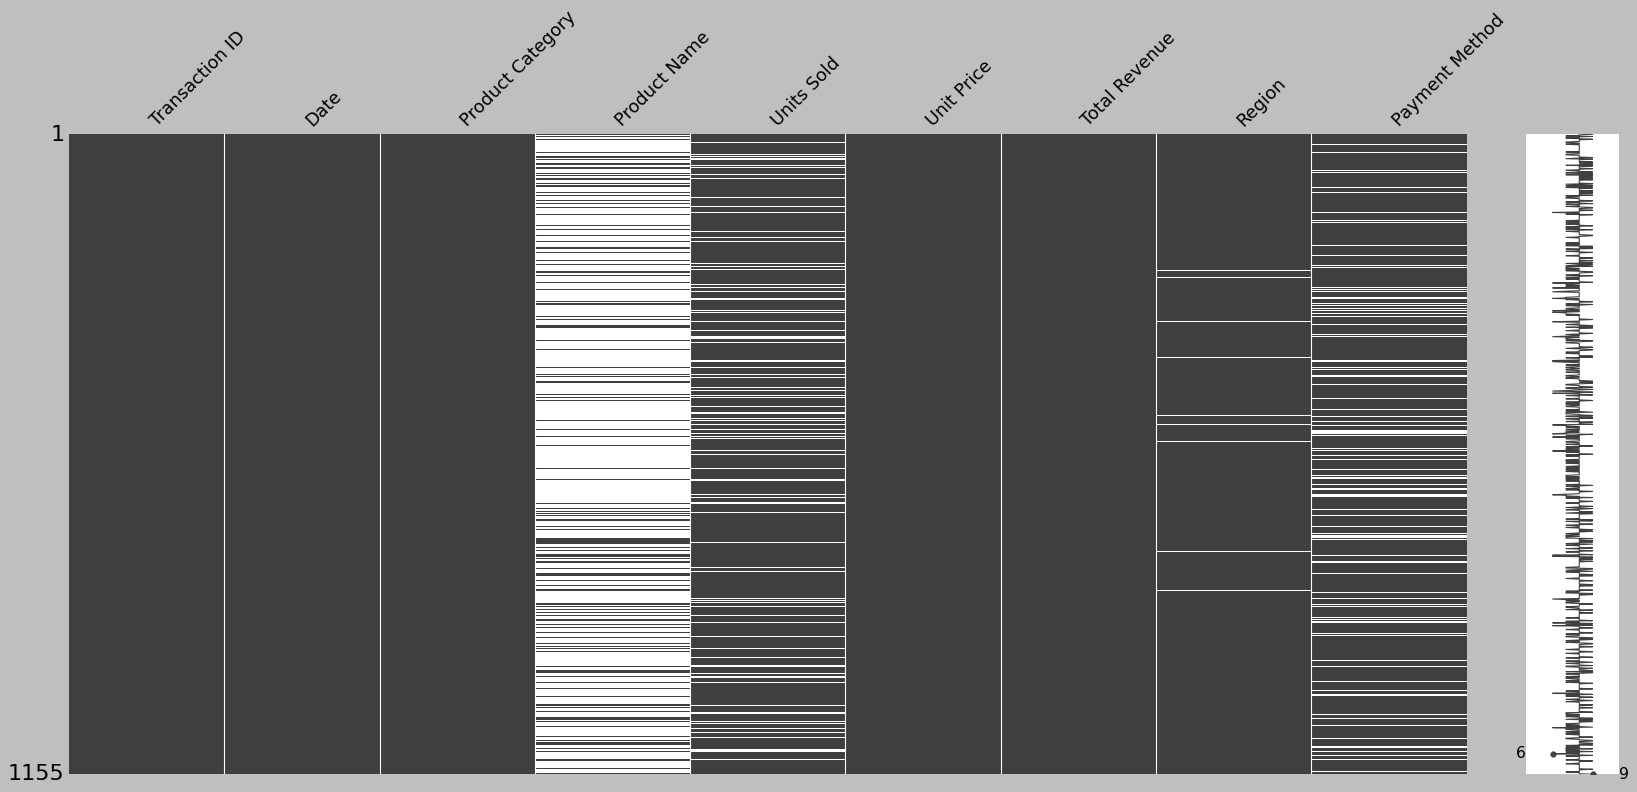

In [12]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
msno.matrix(df)
plt.tight_layout()
plt.show()

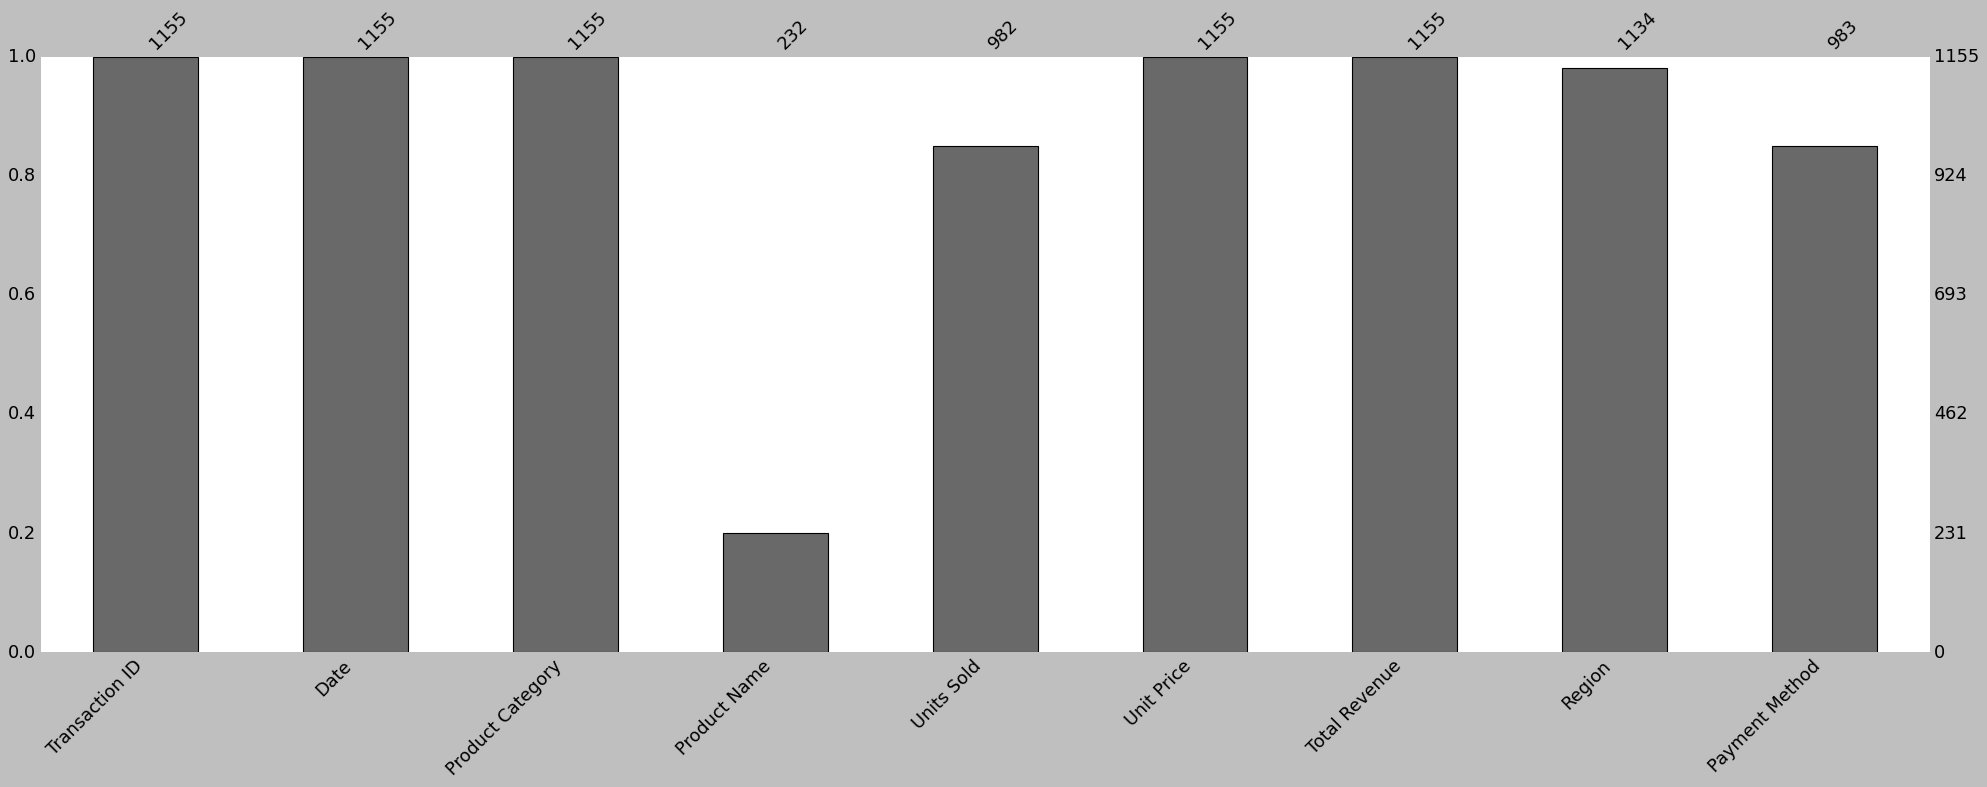

In [13]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
msno.bar(df)
plt.tight_layout()
plt.show()

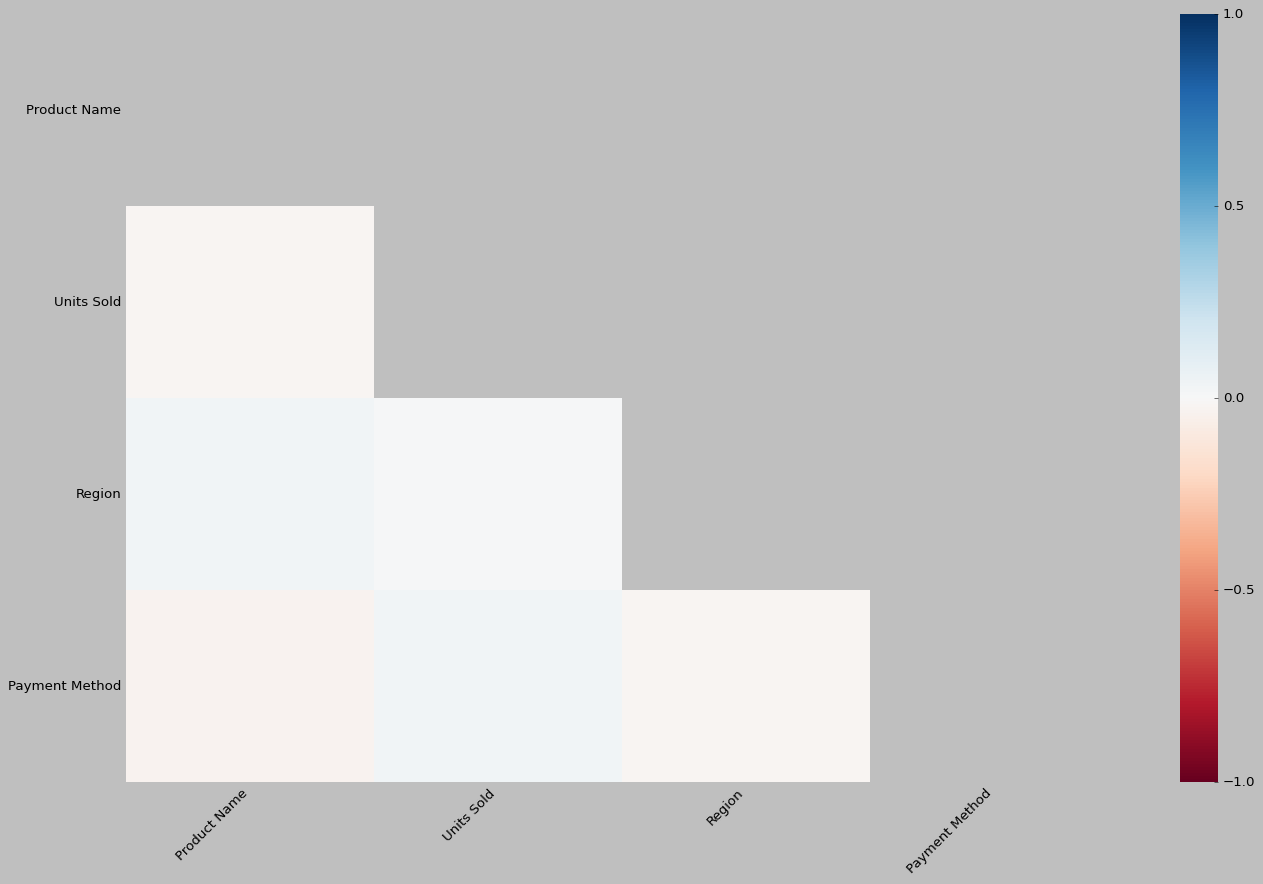

In [14]:
plt.style.use("classic")
msno.heatmap(df,fontsize=12)
plt.show()

In [15]:
df[((df['Region'].isnull())&(df['Units Sold'].isnull())&(df['Payment Method'].isnull()))]


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method


***Insights***

*Missing values are likely to be MCAR as we don't have any coorelation between missing values and other variables*


In [16]:
df.drop(columns=['Product Name'],inplace=True)

*I deleted the Product Name column as it is usless*

In [17]:
df['Units Sold'] = df.groupby('Product Category')['Units Sold'].transform(lambda x: x.fillna(x.mode()[0]))

*I filled units sold with the category as diffrent catgories has diffrent values by nature for example : it is normal to buy 3 or 4 books but for electronic devices it is not usual*

In [18]:
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

In [19]:
df['Payment Method'] = df.groupby('Region')['Payment Method'].transform(lambda x: x.fillna(x.mode()[0]))

*People from diffrent Regions have diffrent prefrence for payment methods for example: egyptians love cash more than any other method*

***Type Validation***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Units Sold        1155 non-null   object 
 4   Unit Price        1155 non-null   object 
 5   Total Revenue     1155 non-null   float64
 6   Region            1155 non-null   object 
 7   Payment Method    1155 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 72.3+ KB


In [21]:
df ['Date'] = df['Date'].str.replace(' 00:00:00','')
df['Date'] = pd.to_datetime(df['Date'])

***First I removed the time from some columns then I converted it to date time***

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1155 non-null   int64         
 1   Date              1155 non-null   datetime64[ns]
 2   Product Category  1155 non-null   object        
 3   Units Sold        1155 non-null   object        
 4   Unit Price        1155 non-null   object        
 5   Total Revenue     1155 non-null   float64       
 6   Region            1155 non-null   object        
 7   Payment Method    1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 72.3+ KB


In [23]:
df['Product Category'] = df['Product Category'].astype("category")
#df['Units Sold'] = df['Units Sold'].astype("int64") this gives error 
#df['Unit Price'] = df['Unit Price'].astype("float64") this gives error
df['Region'] = df['Region'].astype("category")
df['Payment Method'] = df['Payment Method'].astype("category")

***We can see that units sold have values with letter x in it***

***To handle this error we should handle units sold columns***

In [24]:
df[df['Units Sold'].str.contains('x')]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
372,10373,2024-01-08,Books,3.0x,973.53,2920.59,North America,Credit Card
602,10603,2024-01-31,Beauty Products,1.0x,452.36,452.36,North America,Cryptocurrency
735,10736,2024-05-07,Sports,1.0x,469.16,469.16,Asia,PayPal
828,10829,2025-04-09,Books,2.0x,100.87,201.74,North America,Credit Card
863,10864,2025-01-17,Beauty Products,1.0x,94.12,94.12,North America,Credit Card
1130,10373,2024-01-08,Books,3.0x,973.53,2920.59,North America,Credit Card


***By observing these values we can notice that the number exists in the first digit***

In [25]:
df.loc[df['Units Sold'].str.contains("x"),'Units Sold'] =df[df['Units Sold'].str.contains("x")]['Units Sold'].str[0] 

***So I replaced the whole number with the first digit***

In [26]:
df[df['Units Sold'].str.contains('x')]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method


***Now it's all integer values***

In [27]:
df['Product Category'] = df['Product Category'].astype("category")
df['Units Sold'] = df['Units Sold'].astype("int64") 
#df['Unit Price'] = df['Unit Price'].astype("float64") this gives error
df['Region'] = df['Region'].astype("category")
df['Payment Method'] = df['Payment Method'].astype("category")

***we can see that some unit prices got the value ERROR in it which implies that some error in the system occured during collecting the data***

In [28]:
df.loc[df['Unit Price'].str.contains("E"),]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
534,10535,2024-12-28,Books,1,$362.93-ERROR,362.93,Asia,Gift Card
677,10678,2024-09-10,Sports,2,$782.64-ERROR,1565.28,North America,Credit Card
878,10879,2024-06-18,Books,1,$1.0-ERROR,3.00,North America,PayPal
963,10964,2024-09-01,Electronics,2,$911.1-ERROR,1822.20,Asia,Credit Card
981,10982,2024-12-04,Beauty Products,3,$968.4-ERROR,2905.20,Asia,Credit Card
1047,11048,2024-02-06,Electronics,1,$835.87-ERROR,921.84,Europe,PayPal
1107,11048,2024-02-06,Electronics,1,$835.87-ERROR,835.87,Europe,PayPal


***We can notice that we have most of the price except some digits so we can replace it***

In [29]:
df.loc[df['Unit Price'].str.contains("ERROR"),"Unit Price"] = df.loc[df['Unit Price'].str.contains("ERROR"),"Unit Price"].str.replace("-ERROR","")
df.loc[df['Unit Price'].str.contains("$"),"Unit Price"] = df.loc[df['Unit Price'].str.contains("$"),"Unit Price"].str.replace("$","")

***I just deleted the error part now it is just numbers***

In [30]:
df['Product Category'] = df['Product Category'].astype("category")
df['Units Sold'] = df['Units Sold'].astype("int64") 
df['Unit Price'] = df['Unit Price'].astype("float64")
df['Region'] = df['Region'].astype("category")
df['Payment Method'] = df['Payment Method'].astype("category")

***duplicates handling***

In [31]:
df["Transaction ID"].value_counts()

Transaction ID
10941    3
11098    2
10253    2
10390    2
10190    2
        ..
11080    1
11081    1
11082    1
11083    1
11084    1
Name: count, Length: 1100, dtype: int64

In [32]:
df.loc[df['Transaction ID'] == 10253,]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
252,10253,2024-12-01,Clothing,3,1.0,3.0,Europe,Credit Card
1100,10253,2024-12-01,Clothing,3,1.0,3.0,Europe,Credit Card


***We should delete these duplicates***

In [33]:
df.drop_duplicates(subset='Transaction ID',inplace = True)

In [34]:
df.loc[df['Transaction ID'] == 10253,]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
252,10253,2024-12-01,Clothing,3,1.0,3.0,Europe,Credit Card


***Outliers***

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1100 non-null   int64         
 1   Date              1100 non-null   datetime64[ns]
 2   Product Category  1100 non-null   category      
 3   Units Sold        1100 non-null   int64         
 4   Unit Price        1100 non-null   float64       
 5   Total Revenue     1100 non-null   float64       
 6   Region            1100 non-null   category      
 7   Payment Method    1100 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 55.5 KB


In [36]:
df.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue
count,1100.000000,1100,1100.000000,1100.000000,1.100000e+03
mean,10550.500000,2024-08-02 15:47:46.909090816,20.479091,454.644709,1.565454e+04
min,10001.000000,2024-01-01 00:00:00,1.000000,1.000000,8.600000e-01
25%,10275.750000,2024-04-08 00:00:00,1.000000,24.862500,5.921000e+01
50%,10550.500000,2024-07-22 12:00:00,2.000000,288.360000,4.496800e+02
75%,10825.250000,2024-11-23 00:00:00,3.000000,643.257500,1.209580e+03
max,11100.000000,2025-04-23 00:00:00,499.000000,4741.230000,2.019764e+06
std,317.686953,NaN,78.989043,665.519843,9.347839e+04


***We can see outliers in Units Sold and Unit price***

Text(0.5, 1.0, 'box plot for the units sold')

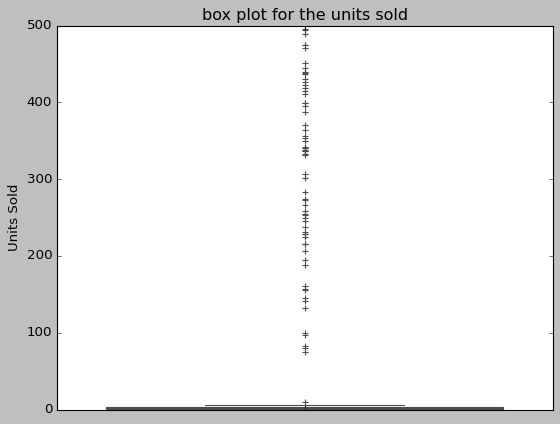

In [37]:
sns.boxplot(df["Units Sold"])
plt.title("box plot for the units sold")

***I think these outliers are real data points as they might be wholesalers*** 

Text(0.5, 1.0, 'box plot for books prices')

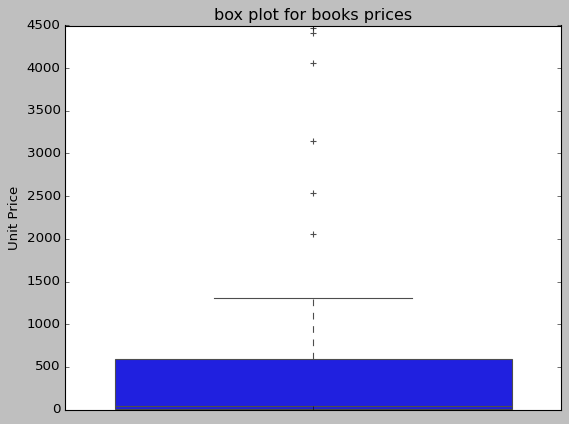

In [38]:
sns.boxplot(df.loc[df['Product Category'] == 'Books',]['Unit Price'])
plt.title("box plot for books prices")

***Unit prices also has outliers but I think it's normal for the market to have so much variance in prices I will handle books only as they are too expensive for books***

In [39]:
books_df = df.loc[df['Product Category'] == 'Books',]

q1 = books_df['Unit Price'].quantile(0.25)
q3 = books_df['Unit Price'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df.loc[((df['Product Category'] == 'Books') & (df['Unit Price'] > upper_bound)),"Unit Price"] = upper_bound
df.loc[((df['Product Category'] == 'Books') & (df['Unit Price'] < lower_bound)),"Unit Price"]= lower_bound

***Data consistency***

In [40]:
df['Total Revenue'] = df['Unit Price'] * df['Units Sold']

***Exploratory Data Analysis***

***1 - Temporal analysis***

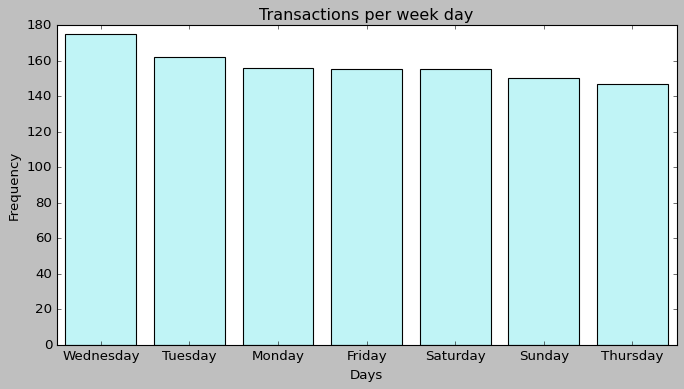

In [41]:
week_days = df['Date'].dt.day_name()
days = week_days.value_counts().index
frequencies = week_days.value_counts().values

plt.figure(figsize=(10,5))
plt.style.use('classic')
sns.barplot(x=days, y=frequencies,color="#B7FCFF")
plt.title("Transactions per week day")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


***We can see that activity in Wednesday is the most***

In [42]:
total_revenue_per_day = df.groupby(df['Date'].dt.day_name())['Total Revenue'].sum()
total_revenue_per_day

Date
Friday       2.865961e+06
Monday       3.094062e+06
Saturday     1.550877e+06
Sunday       1.149357e+06
Thursday     1.661973e+06
Tuesday      2.701646e+06
Wednesday    1.176587e+06
Name: Total Revenue, dtype: float64

***I just mapped each date to day of the week name then I grouped them according to it***

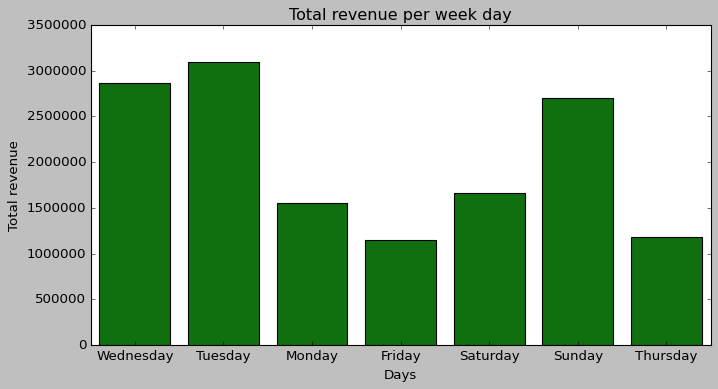

In [43]:
plt.figure(figsize=(10,5))
plt.style.use('classic')
sns.barplot(x=days, y=total_revenue_per_day.values ,color="green")
plt.title("Total revenue per week day")
plt.xlabel("Days")
plt.ylabel("Total revenue")
plt.show()

***We can observe that Sunday has the highest total revenue***

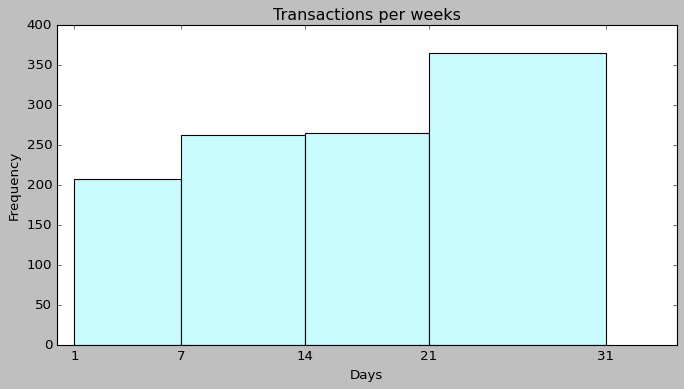

In [44]:
plt.figure(figsize=(10,5))
plt.style.use('classic')
sns.histplot(x=df['Date'].dt.day,bins=[1,7,14,21,31],color="#B7FCFF")
plt.xticks([1,7,14,21,31])
plt.title("Transactions per weeks")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

***The 4th week always has higher activity than the other weeks***

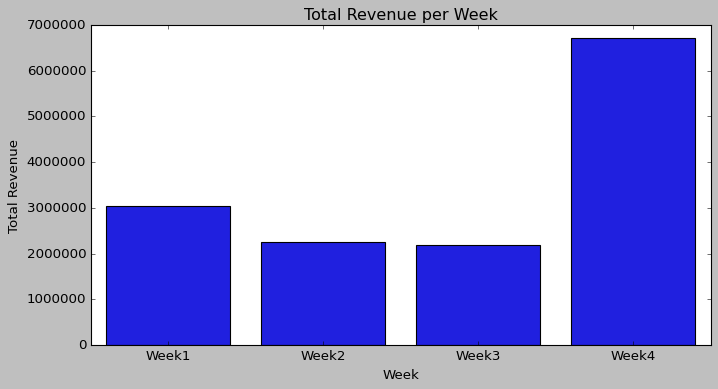

In [45]:
week1 = df.loc[(df['Date'].dt.day >= 1) & (df['Date'].dt.day <= 7),]
week2 = df.loc[(df['Date'].dt.day >= 8) & (df['Date'].dt.day <= 14),]
week3 = df.loc[(df['Date'].dt.day >= 15) & (df['Date'].dt.day <= 21),]
week4 = df.loc[(df['Date'].dt.day >= 22) & (df['Date'].dt.day <= 31),]
week1_revenue = week1['Total Revenue'].sum()
week2_revenue = week2['Total Revenue'].sum()
week3_revenue = week3['Total Revenue'].sum()
week4_revenue = week4['Total Revenue'].sum()
weeks_labels = ['Week1',"Week2","Week3","Week4"]
weeks_values = [week1_revenue,week2_revenue,week3_revenue,week4_revenue]

plt.style.use("classic")
plt.figure(figsize=(10,5))

sns.barplot(x=weeks_labels,y=weeks_values)
plt.title("Total Revenue per Week")
plt.xlabel("Week")
plt.ylabel("Total Revenue")
plt.show()

***We can see that week4 has the highest total revenue***

***I think that people buy more in the last week of the month becuase that's when they get thier paycheck***

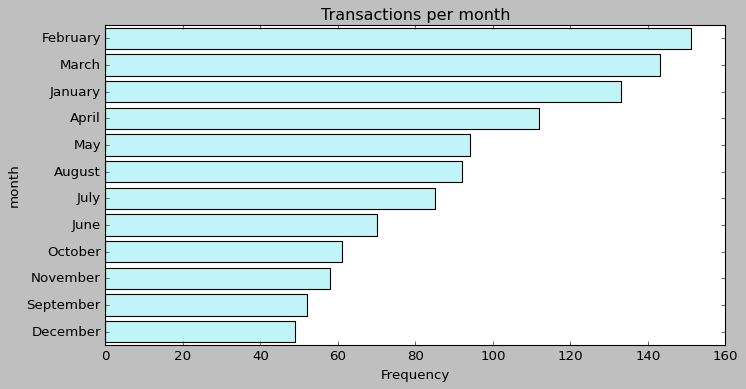

In [46]:
month_names = df['Date'].dt.month_name()
monthes = month_names.value_counts().index
frequencies = month_names.value_counts().values

plt.figure(figsize=(10,5))
plt.style.use('classic')
sns.barplot(x=frequencies, y=monthes,color="#B7FCFF",orient='h')
plt.title("Transactions per month")
plt.xlabel("Frequency")
plt.ylabel("month")
plt.show()

***it seems like the number of transactions decrease as we go through the year***

In [47]:
total_revenue_per_month = df.groupby(df['Date'].dt.month_name())['Total Revenue'].sum()
total_revenue_per_month.sort_values(inplace=True)
total_revenue_per_month = pd.Series(reversed(total_revenue_per_month))
total_revenue_per_month

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\228447840.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_revenue_per_month = pd.Series(reversed(total_revenue_per_month))


0     2.534526e+06
1     2.431205e+06
2     1.596615e+06
3     1.436490e+06
4     1.413110e+06
5     1.358124e+06
6     8.670450e+05
7     8.482531e+05
8     7.765191e+05
9     7.558097e+05
10    1.443112e+05
11    3.845439e+04
dtype: float64

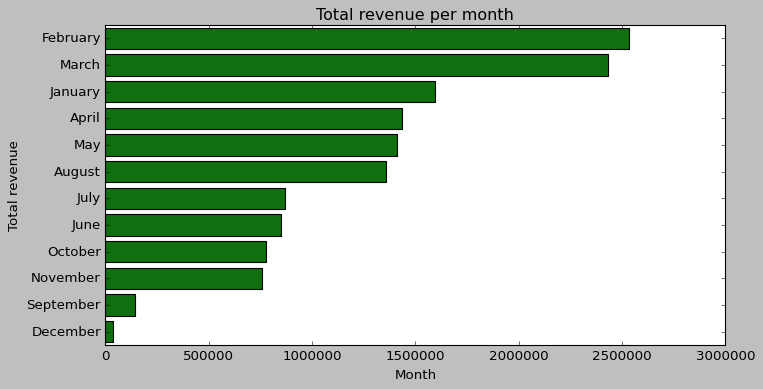

In [48]:
plt.figure(figsize=(10,5))
plt.style.use('classic')
sns.barplot(x=total_revenue_per_month.values, y=monthes ,color="green",orient='h')
plt.title("Total revenue per month")
plt.xlabel("Month")
plt.ylabel("Total revenue")
plt.show()

***There is a strong coorleation between number of transactoins per month and total revenue per month***


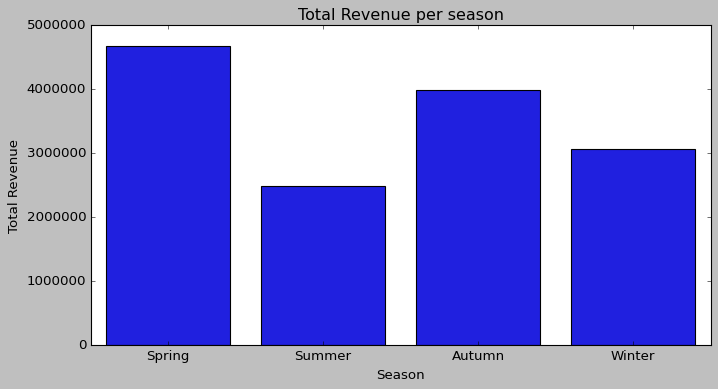

In [49]:
spring = df.loc[(df['Date'].dt.month >= 3) & (df['Date'].dt.month <= 5),]
summer = df.loc[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8),]
autumn = df.loc[(df['Date'].dt.month >= 9) & (df['Date'].dt.month <= 11),]
winter = df.loc[(df['Date'].dt.month == 12) | (df['Date'].dt.month <= 2),]
spring_revenue = spring['Total Revenue'].sum()
summer_revenue = summer['Total Revenue'].sum()
autumn_revenue = autumn['Total Revenue'].sum()
winter_revenue = winter['Total Revenue'].sum()
seasons_labels = ['Spring',"Summer","Autumn","Winter"]
seasons_values = [spring_revenue,summer_revenue,autumn_revenue,winter_revenue]
plt.style.use("classic")
plt.figure(figsize=(10,5))
sns.barplot(x=seasons_labels,y=seasons_values)
plt.title("Total Revenue per season")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.show()

***Why does people buy more on spring ???***

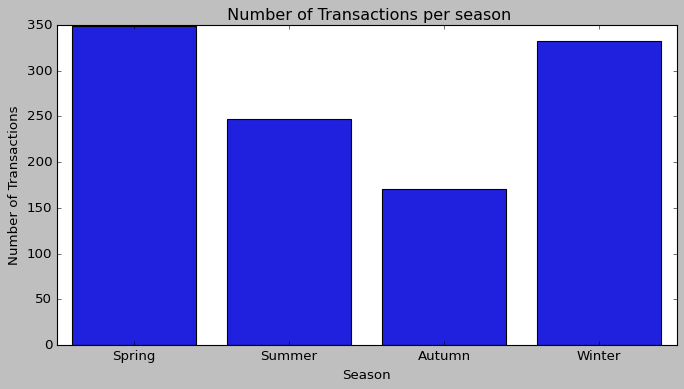

In [50]:
spring_counter = spring['Total Revenue'].count()
summer_counter = summer['Total Revenue'].count()
autumn_counter = autumn['Total Revenue'].count()
winter_counter = winter['Total Revenue'].count()
seasons_labels = ['Spring',"Summer","Autumn","Winter"]
seasons_values = [spring_counter,summer_counter,autumn_counter,winter_counter]
plt.style.use("classic")
plt.figure(figsize=(10,5))
sns.barplot(x=seasons_labels,y=seasons_values)
plt.title(" Number of Transactions per season")
plt.xlabel("Season")
plt.ylabel("Number of Transactions")
plt.show()

In [51]:
total_revenue_monthly = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum()

***I summed every total revenue in every month***

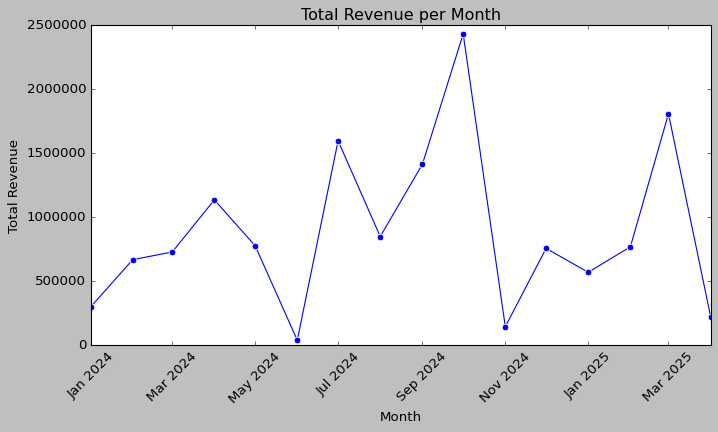

In [52]:
all_months = (total_revenue_monthly.index).to_timestamp()
months_total = total_revenue_monthly.values
plt.figure(figsize=(10,5))
sns.lineplot(x=all_months, y=months_total, marker='o')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

***Product Category Performance***

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3597930321.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_for_each_product = df.groupby(df['Product Category'])['Total Revenue'].sum()


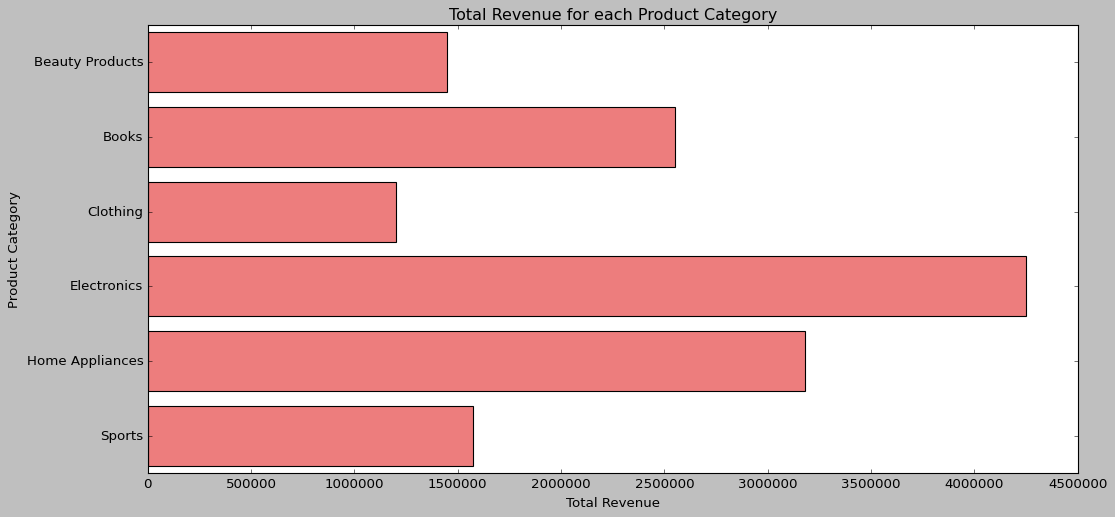

In [53]:
total_revenue_for_each_product = df.groupby(df['Product Category'])['Total Revenue'].sum()

plt.figure(figsize=(15,7))
sns.barplot(y=total_revenue_for_each_product.index,x=total_revenue_for_each_product.values,orient='h',color='#FF6B6B')
plt.title('Total Revenue for each Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

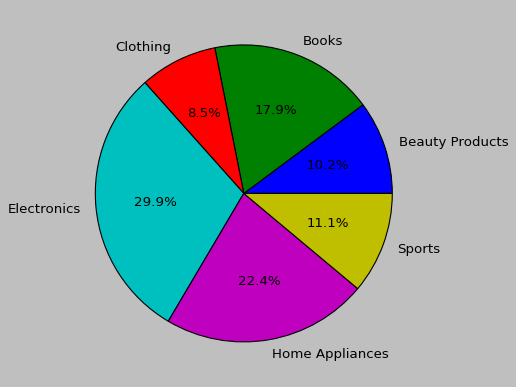

In [54]:
plt.style.use("classic")
plt.figure(figsize=(10,5))
plt.pie(total_revenue_for_each_product,labels=total_revenue_for_each_product.index,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\65163623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_mean_for_each_category = df.groupby(df['Product Category'])['Total Revenue'].mean()


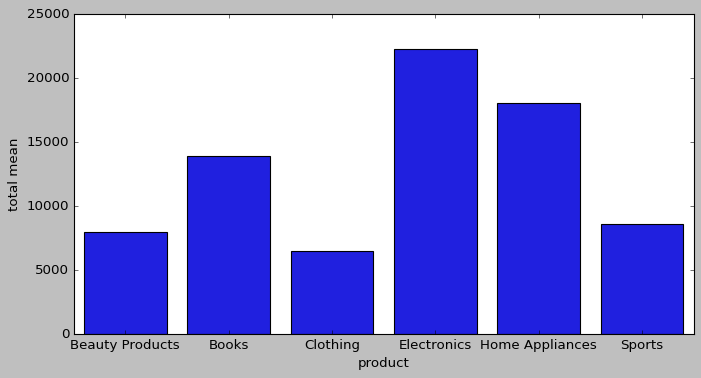

In [55]:
total_mean_for_each_category = df.groupby(df['Product Category'])['Total Revenue'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x = total_mean_for_each_category.index, y = total_mean_for_each_category.values)
plt.xlabel("product")
plt.ylabel("total mean")
plt.show()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1847155957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_wanted_categories = df.groupby(["Product Category"])['Product Category'].count().sort_values(ascending=False)
C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1847155957.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_valued_categories = df.groupby("Product Category")['Total Revenue'].mean().sort_values(ascending=False)


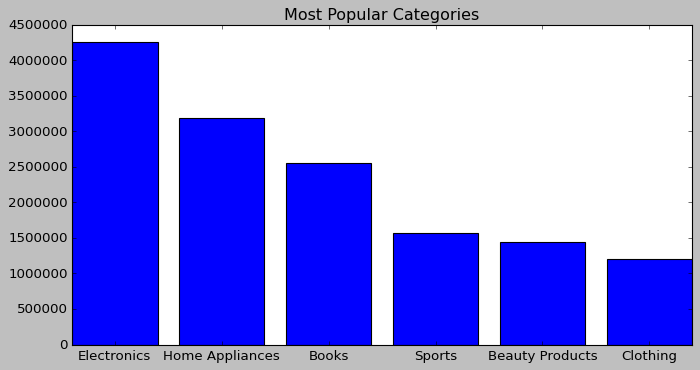

In [56]:
most_wanted_categories = df.groupby(["Product Category"])['Product Category'].count().sort_values(ascending=False)
most_valued_categories = df.groupby("Product Category")['Total Revenue'].mean().sort_values(ascending=False)
most_popular_categories = most_wanted_categories * most_valued_categories
most_popular_categories.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(10,5))
plt.bar(x=most_popular_categories.index, height=most_popular_categories.values)
plt.title('Most Popular Categories')
plt.show()

***Geographic analysis***

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3710134902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_sum_by_region = df.groupby(['Region'])['Total Revenue'].sum()


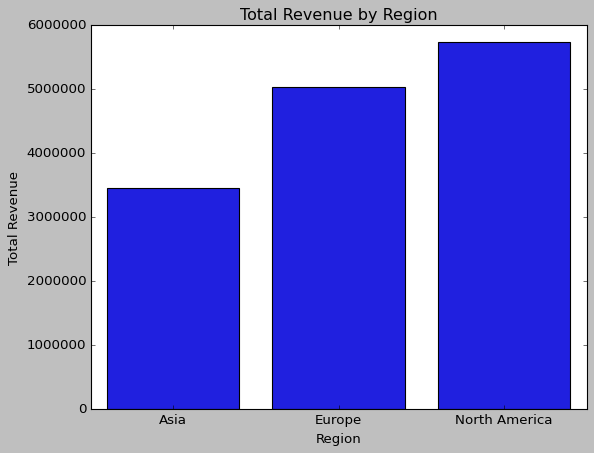

In [57]:
total_revenue_sum_by_region = df.groupby(['Region'])['Total Revenue'].sum()
sns.barplot(x = total_revenue_sum_by_region.index, y = total_revenue_sum_by_region.values)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3156734169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_revenue_sum_by_region = df.groupby(['Region'])['Total Revenue'].mean()


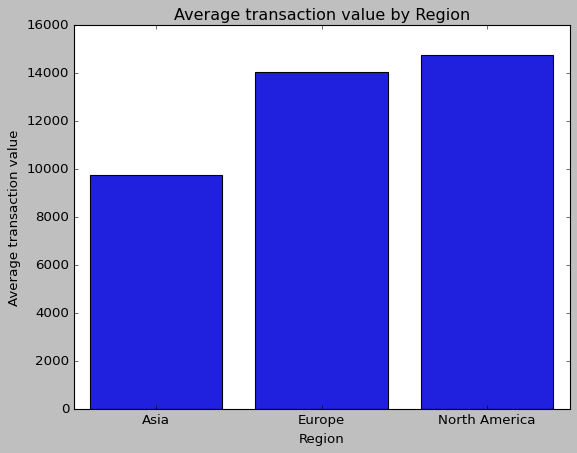

In [58]:
average_revenue_sum_by_region = df.groupby(['Region'])['Total Revenue'].mean()
sns.barplot(x = average_revenue_sum_by_region.index, y = average_revenue_sum_by_region.values)
plt.title('Average transaction value by Region')
plt.xlabel('Region')
plt.ylabel('Average transaction value')
plt.show()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\119585359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_count_by_region = df.groupby(['Region'])['Transaction ID'].count()


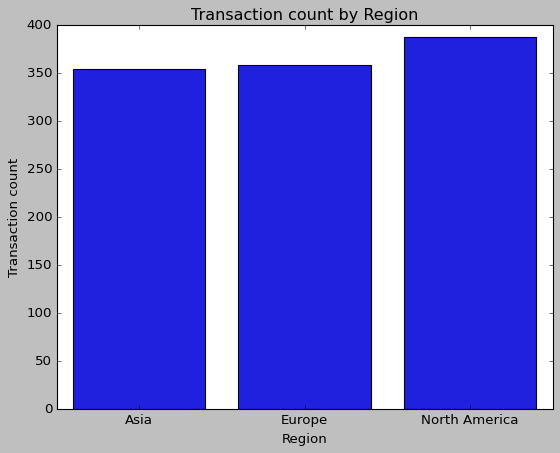

In [59]:
transaction_count_by_region = df.groupby(['Region'])['Transaction ID'].count()
sns.barplot(x = transaction_count_by_region.index, y = transaction_count_by_region.values)
plt.title('Transaction count by Region')
plt.xlabel('Region')
plt.ylabel('Transaction count')
plt.show()

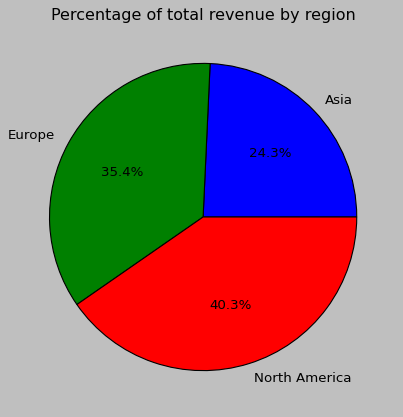

In [60]:
total_revenue_sum_by_region
plt.pie(total_revenue_sum_by_region,labels=total_revenue_sum_by_region.index,autopct="%1.1f%%")
plt.title('Percentage of total revenue by region')
plt.show()

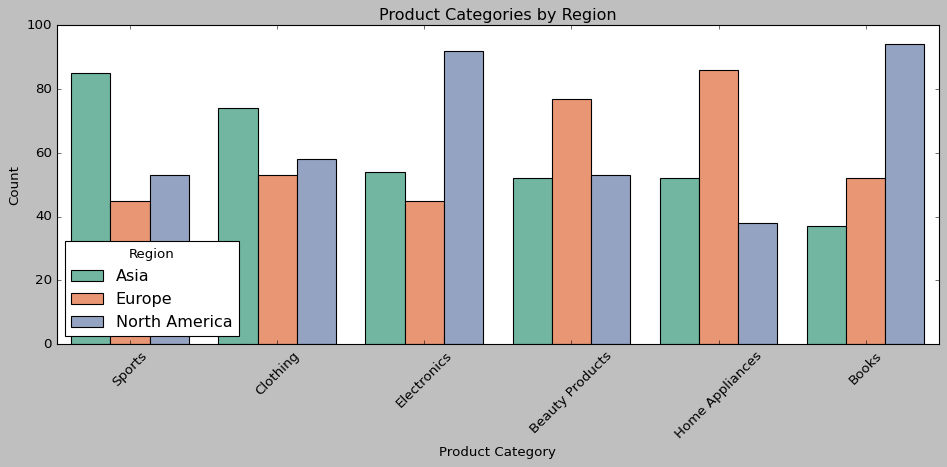

In [61]:
asia_products = df.loc[df['Region'] == 'Asia',"Product Category"].value_counts()
europe_products = df.loc[df['Region'] == 'Europe',"Product Category"].value_counts()
north_america_products = df.loc[df['Region'] == 'North America',"Product Category"].value_counts()


combined_data = []
    
for category in asia_products.index:
    combined_data.append({'Region': 'Asia', 'Product Category': category, 'Count': asia_products[category]})

for category in europe_products.index:
    combined_data.append({'Region': 'Europe', 'Product Category': category, 'Count': europe_products[category]})

for category in north_america_products.index:
    combined_data.append({'Region': 'North America', 'Product Category': category, 'Count': north_america_products[category]})

df_combined = pd.DataFrame(combined_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='Product Category', y='Count', hue='Region', 
            palette='Set2')

plt.title('Product Categories by Region')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Region',loc='lower left')
plt.tight_layout()
plt.show()

***We can see that in north america electronics and books are the most popular***

***While in Asia Sports are the most popular***

***But in Europe home appliances are the most popular***

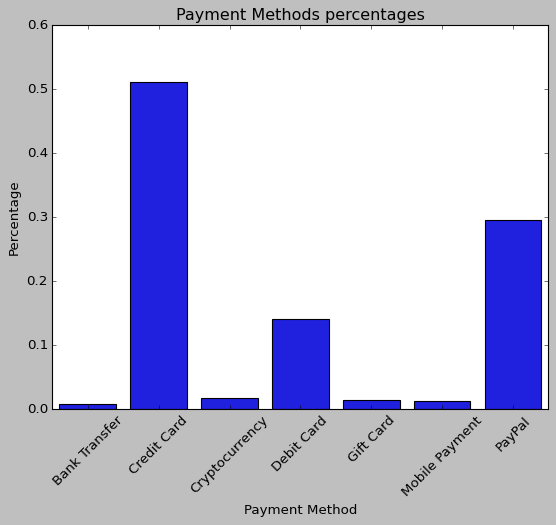

In [62]:
payment_methods = df['Payment Method'].value_counts(normalize=True)
sns.barplot(x = payment_methods.index, y = payment_methods.values)
plt.title('Payment Methods percentages')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

***We can see that most of the customers use credit cards to pay for their orders***


C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\300577372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_methods_total_mean = df.groupby('Payment Method')['Total Revenue'].mean()


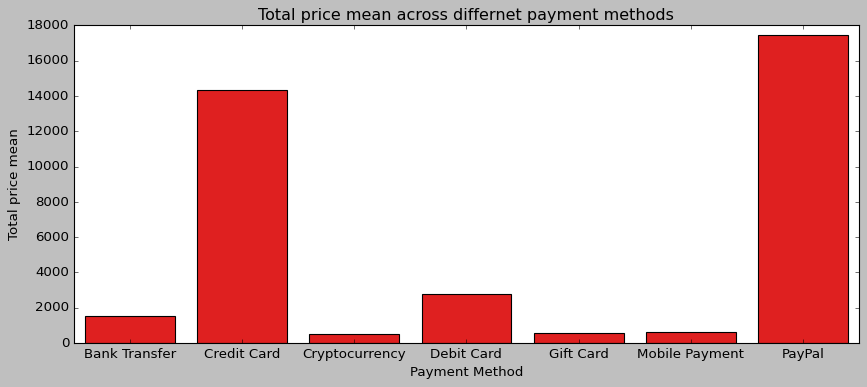

In [63]:
payment_methods_total_mean = df.groupby('Payment Method')['Total Revenue'].mean()
plt.figure(figsize=(11,5))
sns.barplot(x=payment_methods_total_mean.index, y=payment_methods_total_mean.values,color='red')
plt.title("Total price mean across differnet payment methods")
plt.ylabel("Total price mean")
plt.tight_layout()
plt.show()

***Credit Card and PayPal has higher spending rates than others***

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\92376722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asia_payment_method = asia_payment_method.groupby("Payment Method")["Payment Method"].count()


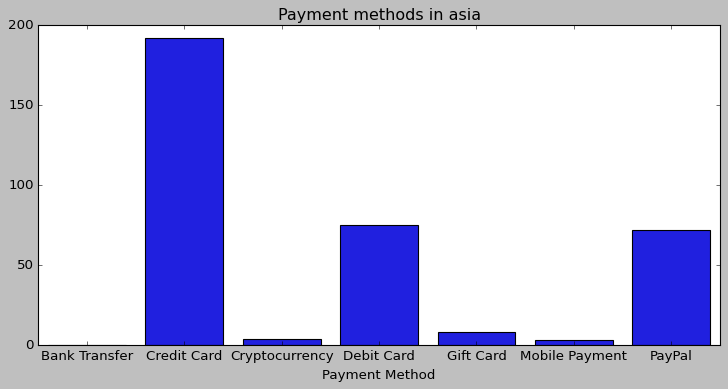

In [64]:
asia_payment_method = df.loc[df['Region'] == 'Asia',]
asia_payment_method = asia_payment_method.groupby("Payment Method")["Payment Method"].count()
plt.figure(figsize=(11,5))
plt.title("Payment methods in asia")
plt.xlabel='Payment methods'
plt.ylabel='Number of payments'
sns.barplot(x=asia_payment_method.index,y=asia_payment_method.values)
plt.show()


C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1136463484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  europe_payment_method = europe_payment_method.groupby("Payment Method")["Payment Method"].count()


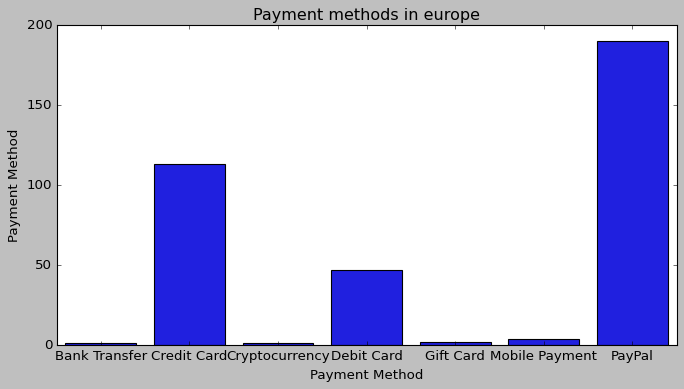

In [65]:
europe_payment_method = df.loc[df['Region'] == 'Europe',]
europe_payment_method = europe_payment_method.groupby("Payment Method")["Payment Method"].count()
plt.figure(figsize=(10,5))
plt.title("Payment methods in europe")
sns.barplot(europe_payment_method)
plt.xlabel='Payment method'

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3653995656.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  north_america_payment_method = north_america_payment_method.groupby("Payment Method")["Payment Method"].count()


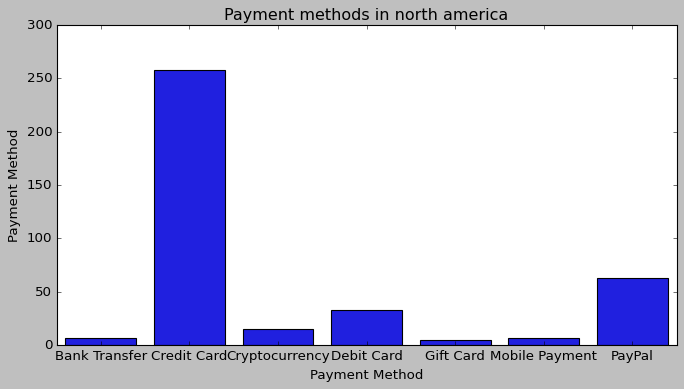

In [66]:
north_america_payment_method = df.loc[df['Region'] == 'North America',]
north_america_payment_method = north_america_payment_method.groupby("Payment Method")["Payment Method"].count()
plt.figure(figsize=(10,5))
plt.title("Payment methods in north america")
sns.barplot(north_america_payment_method)
plt.xlabel='Payment method'
plt.ylabel='Number of payments'
plt.show()


***Price and quantitiy insights***

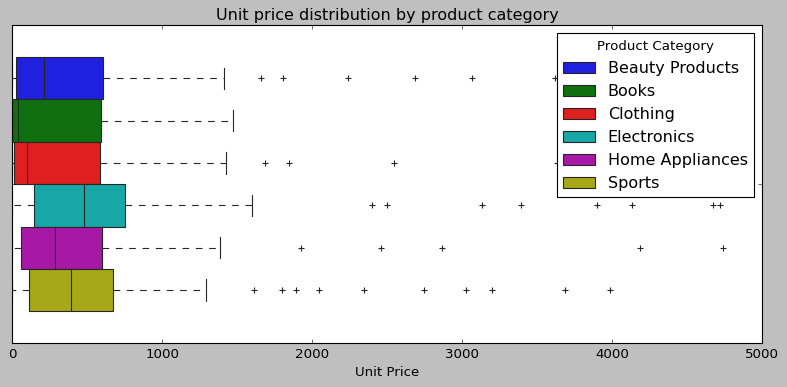

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df,x='Unit Price',hue='Product Category')
plt.title("Unit price distribution by product category")
plt.xlabel="Unit price"
plt.ylabel="Product category"
plt.tight_layout()
plt.show()

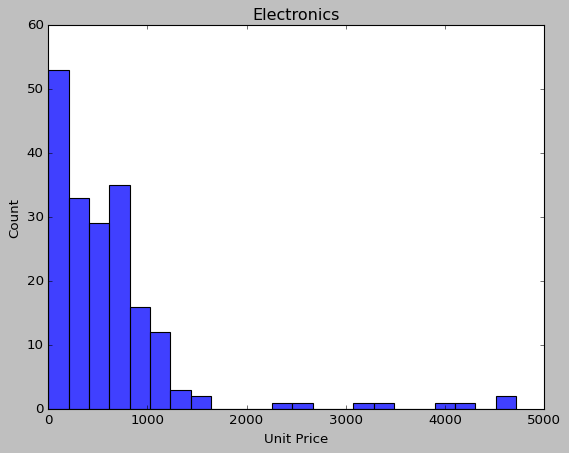

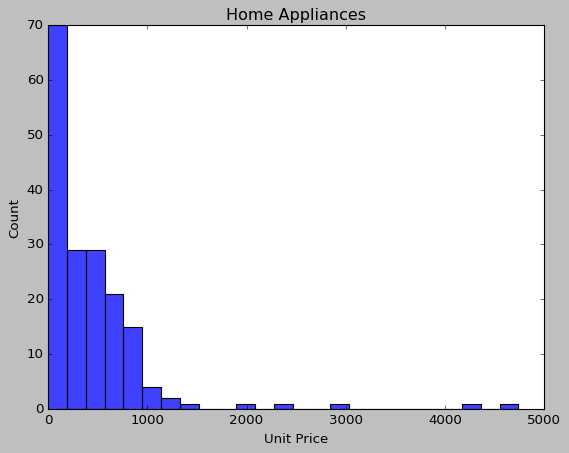

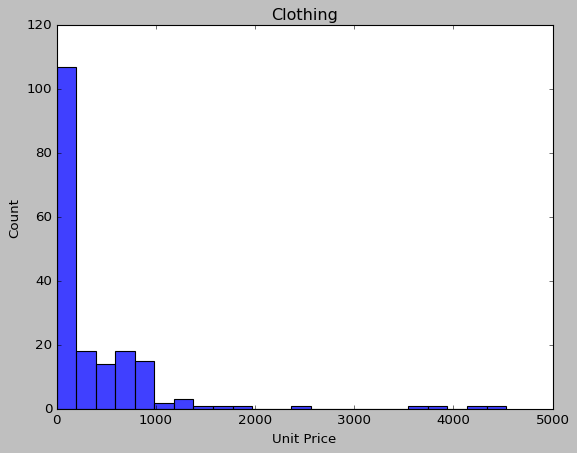

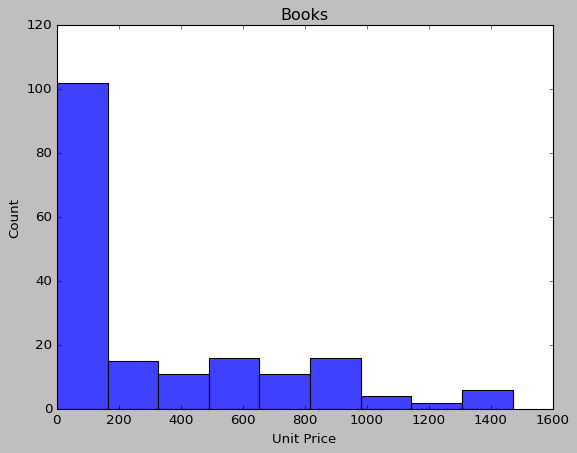

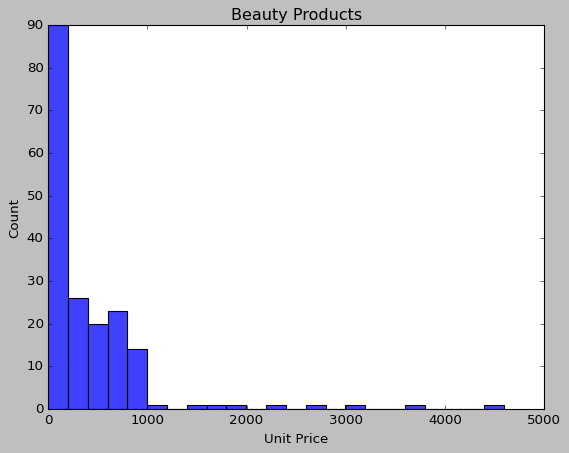

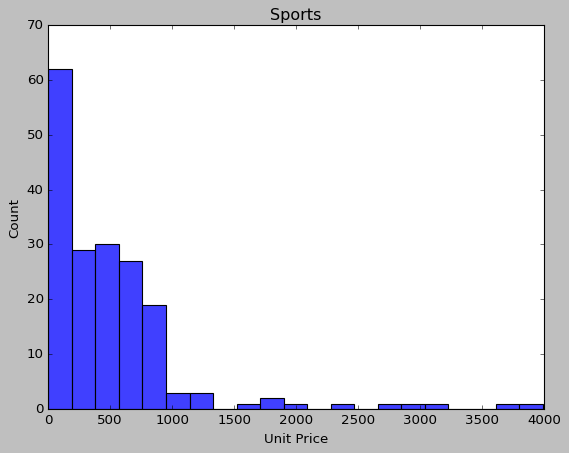

In [68]:
for category in df['Product Category'].unique():
    sns.histplot(df.loc[df['Product Category'] == category,'Unit Price'])
    plt.title(category)
    plt.xlabel="Unit Price"
    plt.ylabel="Product Category"
    plt.show()


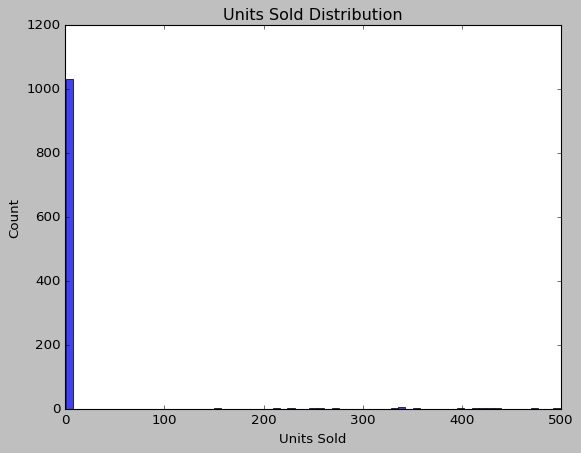

In [69]:
sns.histplot(df['Units Sold'])
plt.title("Units Sold Distribution")
plt.xlabel="Index"
plt.ylabel="Units Sold"
plt.show()


***people are very likely to buy single items***

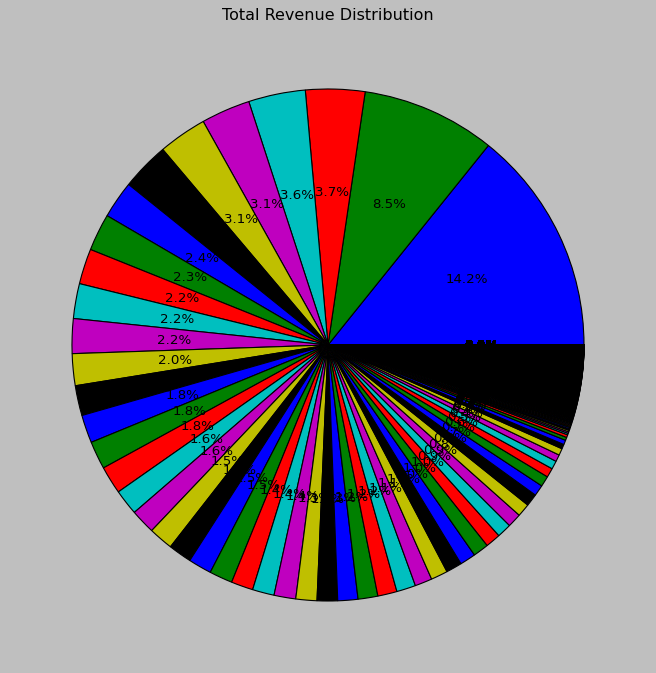

In [70]:
plt.figure(figsize=(20,10))
plt.pie(df['Total Revenue'].sort_values(ascending=False) / df['Total Revenue'].sum(),autopct='%1.1f%%')
plt.title("Total Revenue Distribution")
plt.show()

***We can see that 2  transactions (0.18%)are responsible for 22.7% of total revenues***

***Cross variable relationships***

<Axes: xlabel='Units Sold', ylabel='Unit Price'>

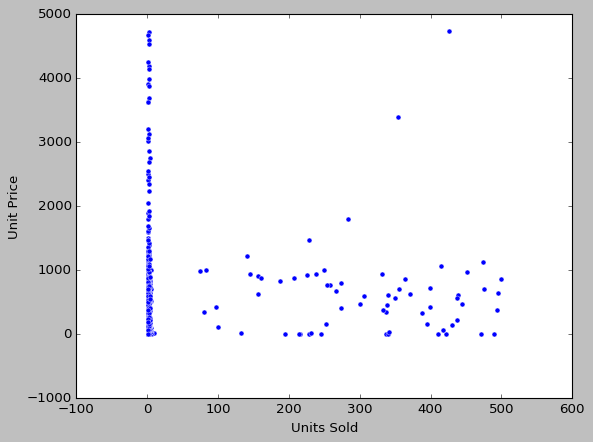

In [71]:
sns.scatterplot(data=df,x='Units Sold',y="Unit Price")

***It seems like there is a weak or no coorelation between units sold and the price***

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1616003363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df.groupby(["Region"])['Total Revenue'].mean(),palette="Set2")
C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1616003363.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.groupby(["Region"])['Total Revenue'].mean(),palette="Set2")


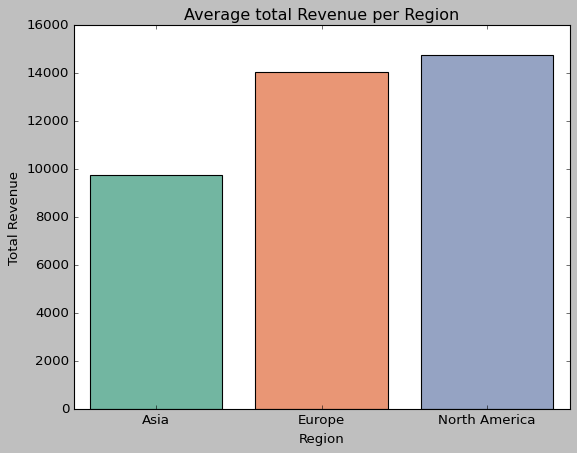

In [72]:
sns.barplot(df.groupby(["Region"])['Total Revenue'].mean(),palette="Set2")
plt.title("Average total Revenue per Region")
plt.ylabel="Total Revenue"
plt.show()

***North America has the highest average total revenue***

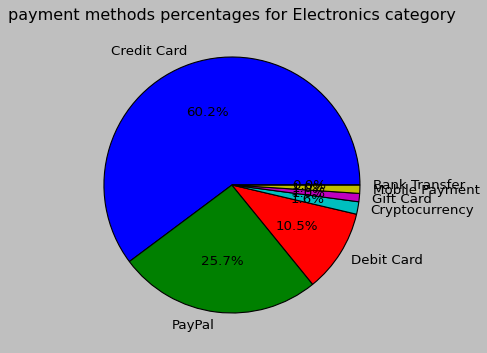

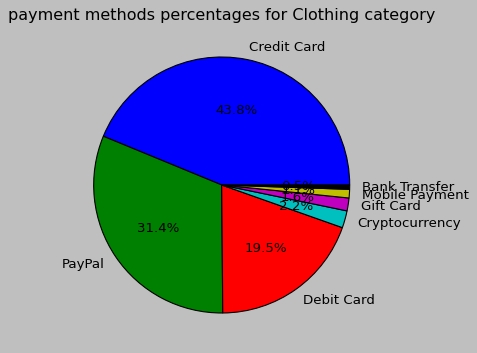

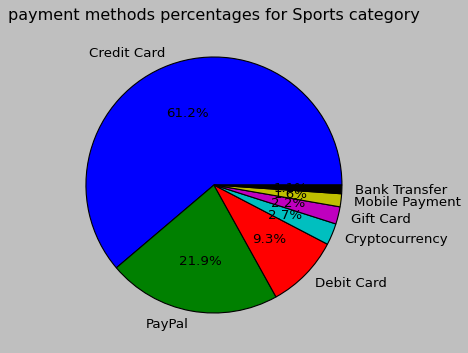

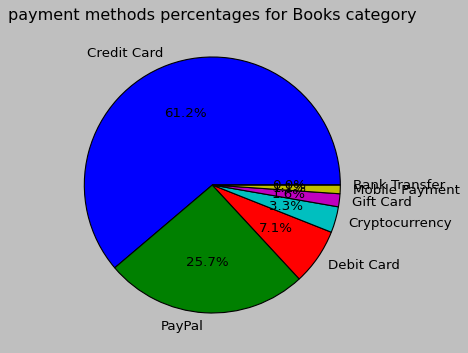

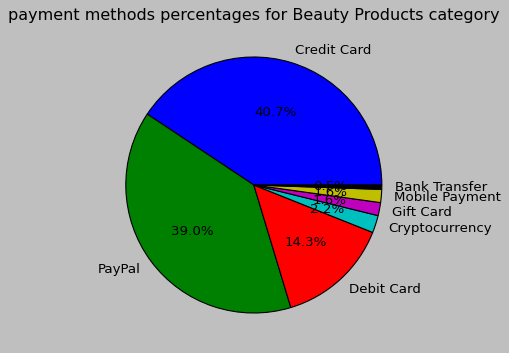

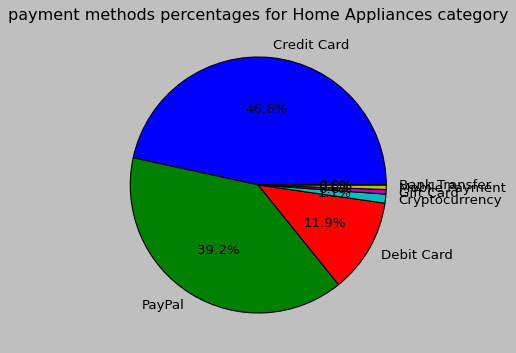

In [73]:
curr = 1
for category in df['Product Category'].value_counts().index:
    plt.figure(curr,figsize=(10,5))
    curr+=1
    plt.pie(df.loc[df['Product Category'] == category, 'Payment Method'].value_counts(),labels=df['Payment Method'].value_counts().index,autopct="%1.1f%%")
    plt.title(f"payment methods percentages for {category} category")



***4. Feature Engineering & Data Transformation***

***Days, Months and Quarters***

In [74]:
df['day of week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.quarter
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1095    2
1096    1
1097    2
1098    1
1099    3
Name: quarter, Length: 1100, dtype: int32

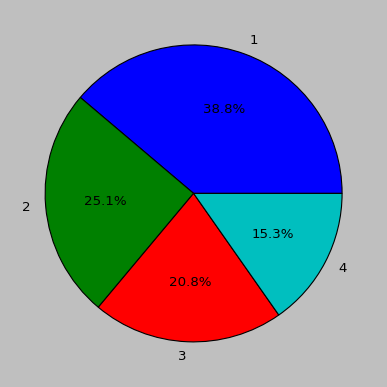

In [75]:
plt.figure(figsize=(10,5))
plt.pie(df['quarter'].value_counts(),labels=df['quarter'].value_counts().index,autopct="%1.1f%%")
plt.tight_layout()
plt.show()

***first quarter has higher transaction rate***

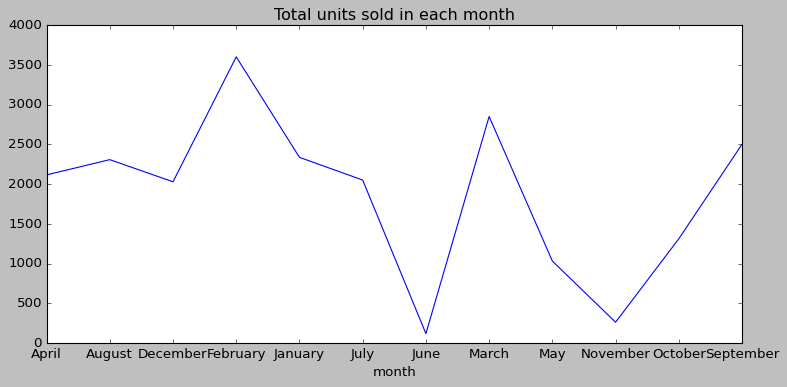

In [76]:
plt.figure(figsize=(10,5))
sold_in_month = df.groupby("month")['Units Sold'].sum()
sns.lineplot(x=sold_in_month.index,y=sold_in_month.values)
plt.title("Total units sold in each month")
plt.tight_layout()
plt.show()

***It could be that whole salers don't buy at June nor November***

***Seasons***

In [77]:
df.loc[(df['Date'].dt.month >= 3) & (df['Date'].dt.month <= 5),"Season"] = "Spring"
df.loc[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8),"Season"] = "Summer"
df.loc[(df['Date'].dt.month >= 9) & (df['Date'].dt.month <= 11),"Season"] = "Fall"
df.loc[(df['Date'].dt.month == 12) | (df['Date'].dt.month <= 2),"Season"] = "Winter"

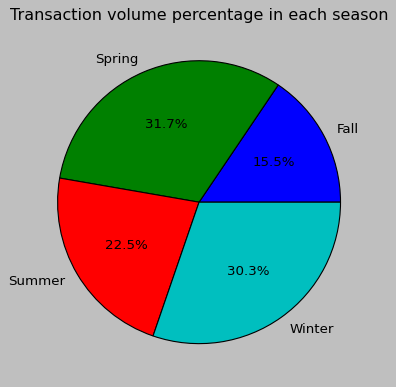

In [78]:
plt.figure(figsize=(10,5))
transactions_per_season = df.groupby('Season')['Transaction ID'].count()
plt.pie(transactions_per_season,labels = transactions_per_season.index,autopct='%1.1f%%')
plt.title("Transaction volume percentage in each season")
plt.tight_layout()
plt.show()

***weekend vs weekday***

In [79]:
df['Week end'] = df['day of week'].isin(['Saturday','Sunday'])
df['Week end']

0       False
1       False
2       False
3       False
4       False
        ...  
1095    False
1096    False
1097    False
1098     True
1099    False
Name: Week end, Length: 1100, dtype: bool

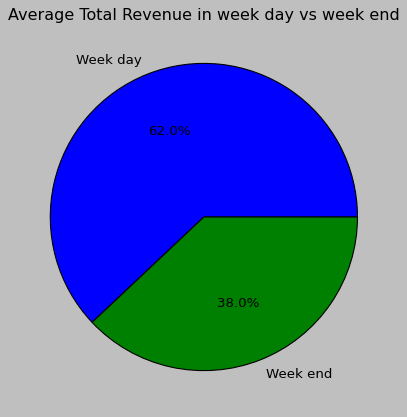

In [80]:
total_revenue_through_week = df.groupby("Week end")['Total Revenue'].mean()
plt.pie(total_revenue_through_week,labels=['Week day','Week end'],autopct="%1.1f%%")
plt.title("Average Total Revenue in week day vs week end")
plt.show()

***The average total price in weekdays are almost twice the average in week ends***

In [81]:
day1 = df['Date'].sort_values().values[0]
df['Days since first transaction'] = df['Date']-day1

***Buisness metrics***

In [82]:
prices = df['Unit Price']
low =prices.quantile(0)
med =prices.quantile(0.25)
high=prices.quantile(0.75)
max =prices.quantile(1)
df['Price category']=pd.cut(prices,bins=[low,med,high,max],labels=['Low','Medium','High'],include_lowest=True)
df.sample(7)


,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day of week,month,quarter,Season,Week end,Days since first transaction,Price category
215,10216,2024-08-03,Sports,1,349.99,349.99,Asia,Credit Card,Saturday,August,3,Summer,True,215 days,Medium
563,10564,2024-12-17,Home Appliances,1,1.00,1.00,Europe,PayPal,Tuesday,December,4,Winter,False,351 days,Low
129,10130,2024-05-09,Books,2,8.99,17.98,North America,Credit Card,Thursday,May,2,Spring,False,129 days,Low
480,10481,2024-11-23,Sports,4,399.48,1597.92,Asia,Mobile Payment,Saturday,November,4,Fall,True,327 days,Medium
923,10924,2024-10-15,Books,1,1.00,1.00,North America,PayPal,Tuesday,October,4,Fall,False,288 days,Low
626,10627,2024-10-13,Home Appliances,1,680.00,680.00,Asia,Credit Card,Sunday,October,4,Fall,True,286 days,High
24,10025,2024-01-25,Electronics,1,299.99,299.99,North America,Credit Card,Thursday,January,1,Winter,False,24 days,Medium


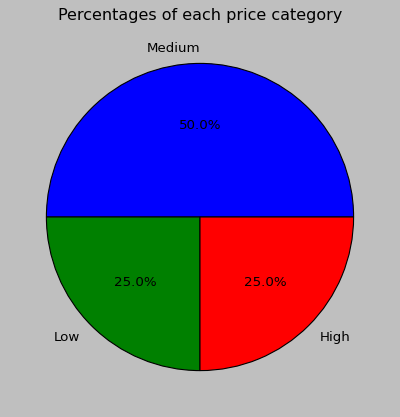

In [83]:
plt.title("Percentages of each price category")
plt.pie(df['Price category'].value_counts(),labels=df['Price category'].value_counts().index,autopct='%1.1f%%')
plt.show()

***Order Size Category***

In [84]:
sizes = df['Units Sold']
single = 0
small = 1
big = 5
max = df['Units Sold'].max()
df['size category']=pd.cut(sizes,bins=[single,small,big,max],labels=['Single Item','Small Bulk','Big Bulk'],include_lowest=True)

***Revenue Tiers***

In [85]:
revenue = df['Total Revenue']
poor = df['Total Revenue'].quantile(0)
med = df['Total Revenue'].quantile(0.33)
rich = df['Total Revenue'].quantile(0.66)
max = df['Total Revenue'].quantile(1)
df['Revenue Tier']=pd.cut(revenue,bins=[poor,med,rich,max],labels=['Budget','Standard','Premium'],include_lowest=True)
df.sample(7)


,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day of week,month,quarter,Season,Week end,Days since first transaction,Price category,size category,Revenue Tier
504,10505,2024-06-12,Clothing,1,1.00,1.00,Europe,Debit Card,Wednesday,June,2,Summer,False,163 days,Low,Single Item,Budget
900,10901,2024-05-25,Beauty Products,4,634.32,2537.28,North America,Debit Card,Saturday,May,2,Spring,True,145 days,Medium,Small Bulk,Premium
864,10865,2024-01-13,Books,1,1.00,1.00,Europe,Debit Card,Saturday,January,1,Winter,True,12 days,Low,Single Item,Budget
709,10710,2024-12-31,Home Appliances,1,225.06,225.06,Asia,Credit Card,Tuesday,December,4,Winter,False,365 days,Medium,Single Item,Standard
211,10212,2024-07-30,Home Appliances,1,169.99,169.99,Europe,PayPal,Tuesday,July,3,Summer,False,211 days,Medium,Single Item,Standard
432,10433,2024-04-25,Clothing,2,37.88,75.76,North America,PayPal,Thursday,April,2,Spring,False,115 days,Medium,Small Bulk,Budget
1054,11055,2024-03-13,Home Appliances,4,222.86,891.44,Europe,PayPal,Wednesday,March,1,Spring,False,72 days,Medium,Small Bulk,Premium


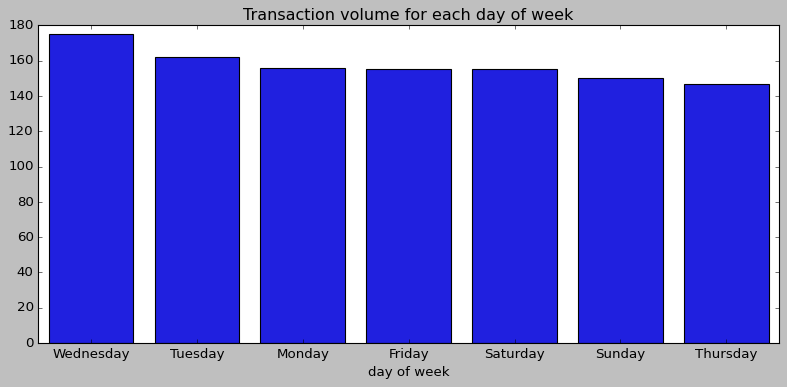

In [86]:
plt.figure(figsize=(10,5))
plt.title("Transaction volume for each day of week")
sns.barplot(x=df['day of week'].value_counts().index,y=df['day of week'].value_counts().values)
plt.tight_layout()
plt.show()

***It's almost consistent but wednesday has more transactions***

***Geographic Features***

In [87]:
geographic_features = pd.DataFrame({
"Revenue concentration":[0,0,0],
"average revenue":[0,0,0],
"transaction volume":[0,0,0]
},index=['North America', 'Europe', 'Asia'])


total_revenue_for_all = df['Total Revenue'].sum()
geographic_features['Revenue concentration']['Asia'] = df.loc[df['Region'] == 'Asia',"Total Revenue"].sum()/total_revenue_for_all 
geographic_features['Revenue concentration']['North America'] = df.loc[df['Region'] == 'North America',"Total Revenue"].sum()/total_revenue_for_all 
geographic_features['Revenue concentration']['Europe'] = df.loc[df['Region'] == 'Europe',"Total Revenue"].sum()/total_revenue_for_all 


geographic_features['average revenue']['Asia'] = df.loc[df['Region'] == 'Asia',"Total Revenue"].mean() 
geographic_features['average revenue']['North America'] = df.loc[df['Region'] == 'North America',"Total Revenue"].mean() 
geographic_features['average revenue']['Europe'] = df.loc[df['Region'] == 'Europe',"Total Revenue"].mean()


geographic_features['transaction volume']['Asia'] = df.loc[df['Region'] == 'Asia',"Total Revenue"].count() 
geographic_features['transaction volume']['North America'] = df.loc[df['Region'] == 'North America',"Total Revenue"].count() 
geographic_features['transaction volume']['Europe'] = df.loc[df['Region'] == 'Europe',"Total Revenue"].count()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\4155114341.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geographic_features['Revenue concentration']['Asia'] = df.loc[df['Region'] == 'Asia',"Total Revenue"].sum()/total_revenue_for_

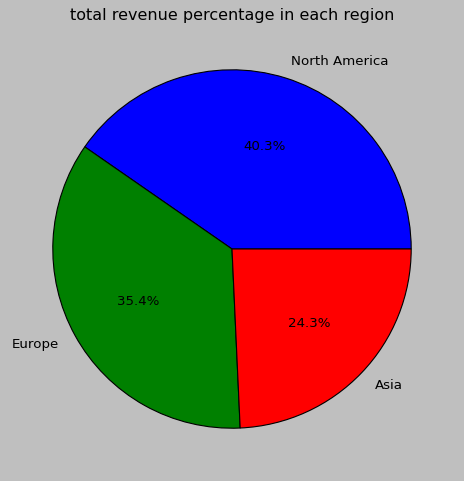

In [88]:
plt.figure(figsize=(12,7))
plt.title("total revenue percentage in each region")
plt.pie(geographic_features['Revenue concentration'],labels = geographic_features['Revenue concentration'].index,autopct='%1.1f%%')
plt.show()

***Advanced features***

***Category features***

In [89]:
Category_performance = pd.DataFrame({
    "Average Selling Price":[0,0,0,0,0,0],
    "transaction volume":[0,0,0,0,0,0],
},index=df['Product Category'].value_counts().index)

In [90]:
for category in df['Product Category'].value_counts().index:
    current_category = df.loc[df['Product Category']== category,'Total Revenue']
    Category_performance.loc[category,"Average Selling Price"]=current_category.sum()/len(current_category.index)

    current_category = df.loc[df['Product Category']== category,]
    Category_performance.loc[category,"transaction volume"]=len(current_category.index)


C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1132733270.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22239.283507853404' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Category_performance.loc[category,"Average Selling Price"]=current_category.sum()/len(current_category.index)


In [91]:
average_price = df['Total Revenue'].sum()/len(df.index)
transactions_volume_average = df['Transaction ID'].count()/len(df['Product Category'].value_counts())
Category_performance['Below average selling point'] = Category_performance['Average Selling Price'] < average_price
Category_performance['Below average transaction volume'] = Category_performance['transaction volume'] < transactions_volume_average

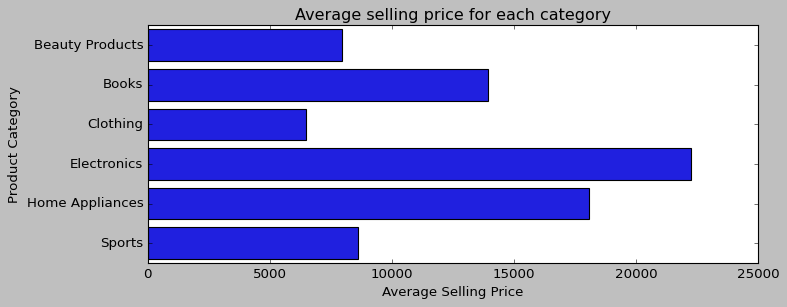

In [92]:
plt.figure(figsize=(10,4))
sns.barplot(x=Category_performance['Average Selling Price'],y=Category_performance.index)
plt.title("Average selling price for each category")
plt.tight_layout()
plt.show()

***Payment features***

In [93]:
payment_types = (df['Payment Method'].value_counts().index.tolist())
payment_features = pd.DataFrame([],payment_types)

In [94]:
payment_features['average transaction'] = [0]*len(payment_types)
for method in df['Payment Method'].value_counts().index:
    average_for_payment = df.loc[df['Payment Method'] == method,'Total Revenue']
    payment_features.loc[method,'average transaction'] = average_for_payment.mean()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\184541881.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14313.487024866785' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  payment_features.loc[method,'average transaction'] = average_for_payment.mean()


In [95]:
for region in df['Region'].value_counts().index:
    payment_features[region] = [0]*len(payment_types)
    for method in df['Payment Method'].value_counts().index:
        payments_in_region = df.loc[(df['Payment Method'] == method) & (df['Region'] == region),]
        payment_features.loc[method,region] = len(payments_in_region.index)


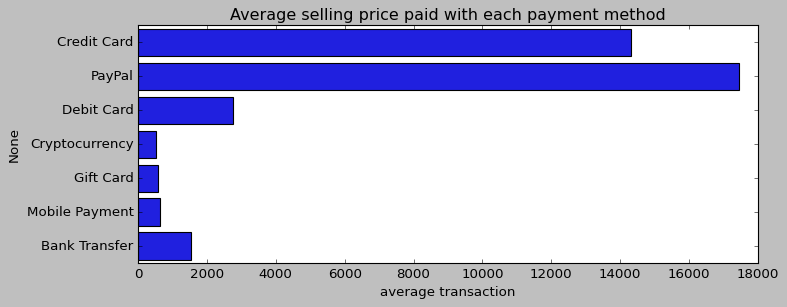

In [96]:
plt.figure(figsize=(10,4))
sns.barplot(x=payment_features['average transaction'],y=payment_features.index)
plt.title("Average selling price paid with each payment method")
plt.tight_layout()
plt.show()

***totally normal because credit card and paypal are used more thus thier average should be more***

***Creating indicators***

***price indicator***

In [97]:
df.loc[df['Price category'] == 'Low','Price indicator'] = 1
df.loc[df['Price category'] == 'Medium','Price indicator'] = 2
df.loc[df['Price category'] == 'High','Price indicator'] = 3

***Size indicator***

In [98]:
df.loc[df['size category'] == 'Single Item','Size indicator'] = 1
df.loc[df['size category'] == 'Small Bulk','Size indicator'] = 2
df.loc[df['size category'] == 'Big Bulk','Size indicator'] = 3

***Total revenue indicator***

In [99]:
df.loc[df['Revenue Tier'] == 'Budget','revenue indicator'] = 1
df.loc[df['Revenue Tier'] == 'Standard','revenue indicator'] = 2
df.loc[df['Revenue Tier'] == 'Premium','revenue indicator'] = 3

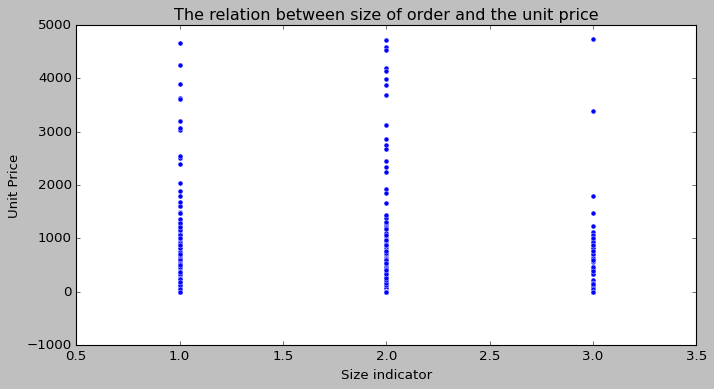

In [100]:
plt.figure(figsize=(10,5))
plt.title("The relation between size of order and the unit price")
sns.scatterplot(data=df,x="Size indicator",y="Unit Price")
plt.show()

***Feature Transformation***

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1099
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Transaction ID                1100 non-null   int64          
 1   Date                          1100 non-null   datetime64[ns] 
 2   Product Category              1100 non-null   category       
 3   Units Sold                    1100 non-null   int64          
 4   Unit Price                    1100 non-null   float64        
 5   Total Revenue                 1100 non-null   float64        
 6   Region                        1100 non-null   category       
 7   Payment Method                1100 non-null   category       
 8   day of week                   1100 non-null   object         
 9   month                         1100 non-null   object         
 10  quarter                       1100 non-null   int32          
 11  Season                

In [102]:
df['day of week'] = df['day of week'].astype("category")
df['month'] = df['month'].astype("category")
df['Season'] = df['Season'].astype("category")
df['revenue indicator'] = df['revenue indicator'].astype("int64")
df['Price indicator'] = df['Price indicator'].astype("int64")
df['Size indicator'] = df['Size indicator'].astype("int64")

In [103]:
df['Region ID'] = df['Region'].astype("str")
df.loc[df['Region'] == 'North America','Region ID'] = 1
df.loc[df['Region'] == 'Europe','Region ID'] = 2
df.loc[df['Region'] == 'Asia','Region ID'] = 3
df['Region ID'] = df['Region ID'].astype("int64")

In [104]:
df['Payment Method ID'] = df['Payment Method'].astype("str")
id = 1
for method in df["Payment Method"].value_counts().index:
    df.loc[df['Payment Method'] == method,'Payment Method ID'] = id
    id+=1
    
df['Payment Method ID'] = df['Payment Method ID'].astype("int64")

In [105]:
df['Product Category ID'] = df['Product Category'].astype("str")
id = 1
for category in df["Product Category"].value_counts().index:
    df.loc[df['Product Category'] == category,'Product Category ID'] = id
    id+=1
    
df['Product Category ID'] = df['Product Category ID'].astype("int64")

In [106]:
df['day number'] = df['Date'].dt.day_of_week
df['month number'] = df['Date'].dt.month

In [107]:
df['Season ID'] = df['Season'].astype("str")
id = 1
for category in df["Season"].value_counts().index:
    df.loc[df['Season'] == category,'Season ID'] = id
    id+=1
    
df['Season ID'] = df['Season ID'].astype("int64")

In [108]:
df['Week end'] = df['Week end'].astype("int64")

***Statistical Analysis & Hypothesis Testing***

***Null hypothesis: mean transaction values are not significally different across regions***

***Alternative hypothesis: mean transaction values are significally different across regions***

***I will use the ANOVA test because I needed to check for more than 2 groups***

In [109]:
alpha = 0.05
t_stat,p_value = stats.f_oneway(df.loc[df['Region'] == 'Asia','Total Revenue'],df.loc[df['Region'] == 'North America','Total Revenue'],df.loc[df['Region'] == 'Europe','Total Revenue'])
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")

Fail to reject the null hypothesis 


***mean transaction values are not significally different across regions***

******

***Null hypothesis: product category prefrence doesn't vary be region***

***Alternative hypothesis: product category prefrence varies be region***

***We should use Chi-square test because we are looking for association between 2 categorical data***

In [110]:
contingency_table=pd.crosstab(df['Product Category'],df['Region'])
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(contingency_table)
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")



Reject the null hypothesis


***Favourite Product categories really varies by region***

******

***Null hypthesis: average order size doesn't differ by payment method***

***Alternative hypothesis: average order size does differ by payment method***

***Test: I will use the t-test because we compare 2 groups only***

In [111]:
t_stasistic,p_value = stats.ttest_ind(df['Units Sold'],df['Payment Method ID'])
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")


Reject the null hypothesis


******
***average order size does differ by payment method***

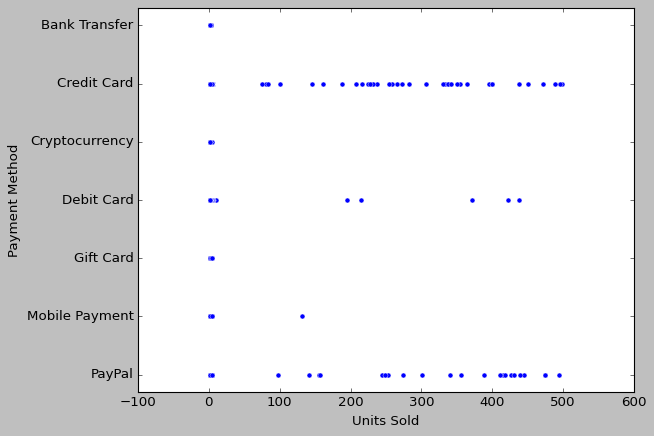

In [112]:
sns.scatterplot(x=df['Units Sold'],y=df['Payment Method'])
plt.show()

***The scatter plot proves our hypothesis***
******

***Null hypothesis: There is no association between payment methods and regions***

***Alternative hypothesis: There is an association between payment methods and regions***

***Test type: chi-square as these are 2 categorical data***

In [113]:
contingency_table=pd.crosstab(df['Payment Method'],df['Region'])
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(contingency_table)
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")

Reject the null hypothesis


***there is really an association between payment method and region***

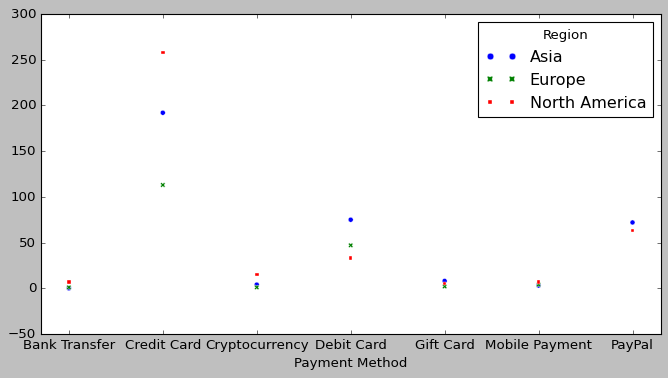

In [114]:
plt.figure(figsize=(10,5))
sns.scatterplot(contingency_table)
plt.show()

***The scatter plot proves it***
******  

***Null hypthesis: average order price doesn't differ by category***

***Alternative hypothesis: average order price does differ by category***

***Test: I will use the t-test because we compare 2 groups only***

In [115]:
t_stasistic,p_value = stats.ttest_ind(df['Total Revenue'],df["Product Category ID"])
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")


Reject the null hypothesis


***The category really affects the average price***
******

In [116]:

contingency_table=pd.crosstab(df['Season'],df['Product Category'])
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(contingency_table)
if(p_value <= alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis ")

Fail to reject the null hypothesis 


***Categorical performance doesn't affect by seasonal changes***

******

***Advanced Analytics & Business Insights***

***1-Revenue Optimization Analysis:***

In [117]:
pd.crosstab(df['Region'],df['Product Category'],values=df['Total Revenue'],aggfunc='sum')

Product Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Region,,,,,,
Asia,467271.23,1.057550e+06,372271.98,1453329.24,42372.55,54151.45
Europe,929377.31,2.211657e+05,345318.37,935770.41,2082920.92,509481.11
North America,48924.83,1.270195e+06,484720.04,1858603.50,1056967.85,1010070.62


***We can see that some categories do bad in some regions like home appliances in Asia and sports in  Asia***

<Axes: xlabel='Unit Price', ylabel='count'>

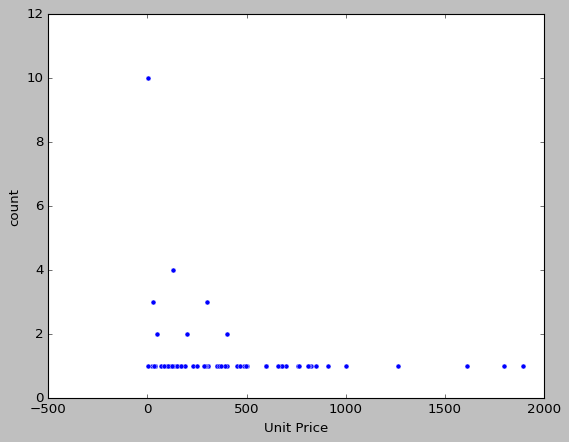

In [118]:
sns.scatterplot(df.loc[(df['Region'] == 'Asia') & (df['Product Category'] == 'Sports'), ]["Unit Price"].value_counts())

we can see that most sports item in asia are between 1000 and 1
******

In [119]:
pd.crosstab(df['Region'],df['Product Category'],values=df['Unit Price'],aggfunc='max')

Product Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Region,,,,,,
Asia,4593.13,1470.6125,4530.81,4669.58,2458.61,1895.00
Europe,3618.18,1223.8400,4242.76,4716.39,4741.23,2744.23
North America,3067.47,1470.6125,3867.47,3899.99,4184.57,3988.06


***prices for sport and home appliances in Asia are the lowest and also their performance are the lowest in Asia***

******

In [120]:
combinations = df.groupby(['Region','Product Category','Payment Method',"Units Sold","Unit Price"],observed=True)['Total Revenue'].mean().reset_index()
combinations.columns=['Region','Product Category','Payment Method',"Units Sold",'Mean revenue',"Unit Price"]
maxx = combinations['Mean revenue'].max()
maximum_combination = combinations.loc[combinations['Mean revenue'] == maxx ]
minn = combinations['Mean revenue'].min()
minimum_combination =combinations.loc[combinations['Mean revenue'] == minn ]


In [121]:
print(minimum_combination)

            Region Product Category Payment Method  Units Sold  Mean revenue  \
0             Asia  Beauty Products    Credit Card           1           1.0   
24            Asia  Beauty Products     Debit Card           1           1.0   
30            Asia  Beauty Products     Debit Card           3           1.0   
32            Asia  Beauty Products      Gift Card           2           1.0   
35            Asia  Beauty Products         PayPal           1           1.0   
..             ...              ...            ...         ...           ...   
937  North America           Sports    Credit Card           1           1.0   
957  North America           Sports    Credit Card           3           1.0   
972  North America           Sports     Debit Card           2           1.0   
975  North America           Sports      Gift Card           1           1.0   
979  North America           Sports         PayPal           1           1.0   

     Unit Price  
0           1.0  
24 

In [122]:
print(maximum_combination)

     Region Product Category Payment Method  Units Sold  Mean revenue  \
596  Europe  Home Appliances         PayPal         426       4741.23   

     Unit Price  
596  2019763.98  


***Business insight***

***It seems to me that costumers buys the products they need without caring about the price furthermore I suggest knowing the most needed product category in each region then increase prices in these categories and regions***

******

***2- Customer Segmentation*** 

In [123]:
customers = df.groupby(['Unit Price','Units Sold','Payment Method',"Season",'Region','Product Category'],observed=True)['Transaction ID'].count().reset_index()
customers.columns=['Unit Price','Units Sold', 'Payment Method',"Season",'Region',"Product Category",'Frequency']

budget_segment_line = df['Total Revenue'].quantile(0.25)
premium_segment_line = df['Total Revenue'].quantile(0.75)
budget_customers = customers.loc[customers["Unit Price"]*customers['Units Sold'] <= budget_segment_line ]

bulk_buyers = customers.loc[customers['Units Sold'] >= 6,]

premium_customers = customers.loc[customers["Unit Price"]*customers['Units Sold'] >= premium_segment_line ]


In [124]:
bulk_buyers.groupby(['Payment Method','Region'])['Frequency'].sum()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\247571291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulk_buyers.groupby(['Payment Method','Region'])['Frequency'].sum()


Payment Method  Region       
Bank Transfer   Asia              0
                Europe            0
                North America     0
Credit Card     Asia             14
                Europe           12
                North America    15
Cryptocurrency  Asia              0
                Europe            0
                North America     0
Debit Card      Asia              3
                Europe            3
                North America     3
Gift Card       Asia              0
                Europe            0
                North America     0
Mobile Payment  Asia              0
                Europe            1
                North America     0
PayPal          Asia              7
                Europe            9
                North America     6
Name: Frequency, dtype: int64

***Bulk Buyers prefer credit card and paypal***

In [125]:
premium_customers.groupby(["Payment Method","Product Category"])['Frequency'].sum()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\2428708772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_customers.groupby(["Payment Method","Product Category"])['Frequency'].sum()


Payment Method  Product Category
Bank Transfer   Beauty Products      1
                Books                0
                Clothing             0
                Electronics          1
                Home Appliances      1
                Sports               2
Credit Card     Beauty Products     18
                Books               22
                Clothing            22
                Electronics         39
                Home Appliances     22
                Sports              30
Cryptocurrency  Beauty Products      0
                Books                3
                Clothing             0
                Electronics          0
                Home Appliances      0
                Sports               0
Debit Card      Beauty Products     10
                Books                1
                Clothing             3
                Electronics          6
                Home Appliances      6
                Sports               4
Gift Card       Beauty Products

***There is a good percentage that uses debit card in premium customers***

In [126]:
budget_customers.groupby(['Payment Method','Product Category'])['Frequency'].sum()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\2444564010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_customers.groupby(['Payment Method','Product Category'])['Frequency'].sum()


Payment Method  Product Category
Bank Transfer   Beauty Products      0
                Books                0
                Clothing             1
                Electronics          1
                Home Appliances      0
                Sports               0
Credit Card     Beauty Products     16
                Books               52
                Clothing            25
                Electronics         10
                Home Appliances     18
                Sports              15
Cryptocurrency  Beauty Products      0
                Books                3
                Clothing             3
                Electronics          0
                Home Appliances      1
                Sports               1
Debit Card      Beauty Products      7
                Books                4
                Clothing            14
                Electronics          5
                Home Appliances     10
                Sports               3
Gift Card       Beauty Products

We see that those who buied books with credit card in the budget segment have high frequency

It could be that they are college students

***I find it weird that someone is in the budget segement but still uses debit card***

***Over all we can observe that budget buyers are looking for prices***

***Business insight***

***I suggest to make offers for buyers in the budget segment in order to increase selling volumes***

In [127]:
premium_distribution = premium_customers.groupby(["Season",'Product Category',"Payment Method","Region"],observed=True)['Frequency'].sum().reset_index()
premium_distribution.loc[premium_distribution['Frequency'] > 2]

,Season,Product Category,Payment Method,Region,Frequency
6,Fall,Books,Credit Card,North America,3
10,Fall,Clothing,Credit Card,North America,5
12,Fall,Electronics,Credit Card,Asia,4
23,Fall,Sports,Credit Card,Asia,4
24,Fall,Sports,Credit Card,Europe,4
33,Spring,Beauty Products,Credit Card,North America,5
34,Spring,Beauty Products,Debit Card,North America,3
41,Spring,Books,Credit Card,North America,3
47,Spring,Clothing,Credit Card,Europe,5
50,Spring,Electronics,Credit Card,Asia,4


***We can see that alot of premium buyers are from North America and buying electronic products***


In [128]:
premium_distribution.groupby("Product Category")['Frequency'].sum().reset_index()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1720954382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_distribution.groupby("Product Category")['Frequency'].sum().reset_index()


,Product Category,Frequency
0,Beauty Products,36
1,Books,40
2,Clothing,34
3,Electronics,63
4,Home Appliances,47
5,Sports,55


In [129]:
premium_distribution.groupby("Region")['Frequency'].sum().reset_index()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3886311745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_distribution.groupby("Region")['Frequency'].sum().reset_index()


,Region,Frequency
0,Asia,76
1,Europe,89
2,North America,110


***Business insight***

***I suggest to make premium subscribtion for north america and for electronic and sports buyers as they are more likely than other buyers to subscribe to the plan***

***3-Comparative Performance Analysis:***
******

***We created category performance during feature engineering***

In [130]:
Category_performance['average order size'] = df.groupby("Product Category")['Units Sold'].mean()

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\1080683062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Category_performance['average order size'] = df.groupby("Product Category")['Units Sold'].mean()


In [131]:
Category_performance['below average order size'] = Category_performance['average order size'] < df['Units Sold'].mean()

In [132]:
Category_performance.sort_values("Average Selling Price",ascending=False)

,Average Selling Price,transaction volume,Below average selling point,Below average transaction volume,average order size,below average order size
Product Category,,,,,,
Electronics,22239.283508,191,False,False,28.544503,False
Home Appliances,18081.030227,176,False,True,20.528409,False
Books,13928.475861,183,False,True,29.131148,False
Sports,8599.470929,183,True,True,18.579235,True
Beauty Products,7942.710824,182,True,True,13.049451,True
Clothing,6498.975081,185,True,False,12.735135,True


***We can see that Electronics are top performer and Clothing is the lowest performer***

In [133]:
df.groupby(["Product Category",'Region'])['Total Revenue'].sum().reset_index().sort_values("Total Revenue",ascending=False)

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\3114290964.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Product Category",'Region'])['Total Revenue'].sum().reset_index().sort_values("Total Revenue",ascending=False)


,Product Category,Region,Total Revenue
13,Home Appliances,Europe,2.082921e+06
11,Electronics,North America,1.858604e+06
9,Electronics,Asia,1.453329e+06
5,Books,North America,1.270195e+06
3,Books,Asia,1.057550e+06
14,Home Appliances,North America,1.056968e+06
17,Sports,North America,1.010071e+06
10,Electronics,Europe,9.357704e+05
1,Beauty Products,Europe,9.293773e+05
16,Sports,Europe,5.094811e+05


In [134]:
df.groupby(["Payment Method"])['Total Revenue'].sum().sort_values(ascending=False)

C:\Users\firefox\AppData\Local\Temp\ipykernel_15920\432065773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Payment Method"])['Total Revenue'].sum().sort_values(ascending=False)


Payment Method
Credit Card       8.058493e+06
PayPal            5.673237e+06
Debit Card        4.280818e+05
Bank Transfer     1.232489e+04
Cryptocurrency    1.073595e+04
Mobile Payment    8.875470e+03
Gift Card         8.714600e+03
Name: Total Revenue, dtype: float64

***Business insight***

***I suggest to make partnership with Credit Card and PayPal companies as most customers are paying with them***